#Introduction
###The importance of understanding where the United States has electric vehicle charging. 

Humanity is the proverbial frog in the pot of boiling water, swimming around happily without any clue that it is being boiled alive. As the collective consciousness of the United States of America comes to accept that as a country, and a planet’s population, humanity is faced with a potential mass extinction event, in the form of the increasingly dire climate crisis, out of which innovation is our only escape. To reach carbon neutrality and curb the artificial heating of our only planet we look to new technologies that will allow humanity to indulge in the comforts we have today without the drawbacks of today. The cornerstone of this technological revolution is a more efficient and powerful battery. Such a battery would allow humanity to be increasingly selective of our power generation processes. No modern day necessity is more obvious of this need than the automotive industry, which produces “nearly one-fift of America’s greenhouse-gas emissions (GHGs).” (Mckinsey) A crucial part of transitioning from point-of-consumption transportation is a distributed and convenient network of fast charging stations that will allow for people to get to where they are going without needing to burn fossil fuels. Unfortunately, “a significant share of EV charging infrastructure exists in just a handful of states,” so the United States has a long way to go before the technology becomes ubiquitous (GovTech). Along the way we will need to solve many more problems including faster charging, less downtime for chargers and more onsite renewable energy generation. While those technologies are still in development the United States should be building out its charging infrastructure so that when the new breakthroughs in electricity generation and electricity storage they can be plugged directly into the charging network. The first step in understanding where the infrastructure needs to be built out is understanding where the infrastructure exists, where people are and where those people are going. With this data analysis we plan on helping to identify where the infrastructure currently exists to allow the decision makers to help build a better charging network. 

1. Climate Central Solutions Brief: Battery Energy Storage (https://www.climatecentral.org/news/climate-central-solutions-brief-battery-energy-storage) 

2. “Building the electric-vehicle charging infrastructure America needs” (https://www.mckinsey.com/industries/public-and-social-sector/our-insights/building-the-electric-vehicle-charging-infrastructure-america-needs)

3. “Interactive Map Shows Every EV Charging Station in U.S.” (https://www.govtech.com/fs/interactive-map-shows-every-ev-charging-station-in-u-s) 

4. “Car Emissions and Global Warming” (https://www.ucsusa.org/resources/car-emissions-global-warming#:~:text=Our%20personal%20vehicles%20are%20a,for%20every%20gallon%20of%20gas.) 

5. “Broken Charging Stations Could Be Stalling the EV Movement” (https://www.wired.com/story/ev-charger-broken-us-electric-cars/) 

6. “The death of the gas station” (https://www.vox.com/recode/23023671/ev-charging-network-gas-station-fast-charger) 

7. “Electric Vehicle Charging 101” (https://www.nrdc.org/experts/patricia-valderrama/electric-vehicle-charging-101) 

8. “COMPARING PUBLIC ELECTRIC VEHICLE CHARGING NETWORKS” (https://www.myev.com/research/comparisons/comparing-public-electric-vehicle-charging-networks) 

9. “Global EV Outlook 2020” (https://www.iea.org/reports/global-ev-outlook-2020) 

10. “Lithium-ion battery charged to 60% in 5.6 minutes with ordered anode” (https://techxplore.com/news/2022-04-lithium-ion-battery-minutes-anode.html)


<img src = https://inc42.com/wp-content/uploads/2019/05/ev-feature-1.jpg >

# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import re
import warnings
warnings.simplefilter(action='ignore')

!pip install pulp
!pip install pycebox
from pycebox.ice import ice, ice_plot

!pip install tpot

from tpot import TPOTRegressor
from tpot import TPOTClassifier
import time

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#supervised learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# more advanced ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier


# Importing Charging Stations Data

In [ ]:
# "https://drive.google.com/file/d/1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM/view?usp=sharing"
!gdown --id 1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1aFEg3yOOqY8wiXJZYNrExQbzHbkm6hgM
To: /content/chargingStations.csv
100% 18.7M/18.7M [00:00<00:00, 230MB/s]


In [ ]:
# main data set
df = pd.read_csv('chargingStations.csv',converters={'ZIP': lambda x: str(x)})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57552 entries, 0 to 57551
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    57552 non-null  object 
 1   Station Name                      57552 non-null  object 
 2   Street Address                    57550 non-null  object 
 3   Intersection Directions           4879 non-null   object 
 4   City                              57552 non-null  object 
 5   State                             57552 non-null  object 
 6   ZIP                               57552 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     53105 non-null  object 
 9   Status Code                       57552 non-null  object 
 10  Expected Date                     392 non-null    object 
 11  Groups With Access Code           57552 non-null  object 
 12  Acce

Fuel Type Code                                       Station Name  \
0            CNG               Spire - Montgomery Operations Center   
1            CNG                                PS Energy - Atlanta   
2            CNG       Metropolitan Atlanta Rapid Transit Authority   
3            CNG                              United Parcel Service   
4            CNG  Clean Energy - Texas Department of Transportation   

         Street Address                            Intersection Directions  \
0      2951 Chestnut St                                                NaN   
1      340 Whitehall St  From I-7585 N, exit 91 to Central Ave, left on...   
2   2424 Piedmont Rd NE                                                NaN   
3  270 Marvin Miller Dr                                                NaN   
4   7721A Washington St  I-10, Washington Ave exit, 1.5 blocks to the s...   

         City State    ZIP  Plus4 Station Phone Status Code  ...  \
0  Montgomery    AL  36107    NaN           NaN           E  ...   
1     Atlanta    GA  30303    NaN  770-350-3000           E  ...   
2     Atlanta    GA  30324    NaN           NaN           E  ...   
3     Atlanta    GA  30336    NaN           NaN           E  ...   
4     Houston    TX  77007    NaN  866-809-4869           E  ...   

  EV Pricing (French) LPG Nozzle Types Hydrogen Pressures Hydrogen Standards  \
0                 NaN              NaN                NaN                NaN   
1                 NaN              NaN                NaN                NaN   
2                 NaN              NaN                NaN                NaN   
3                 NaN              NaN                NaN                NaN   
4                 NaN              NaN                NaN                NaN   

  CNG Fill Type Code    CNG PSI CNG Vehicle Class  LNG Vehicle Class  \
0                  B       3600                MD                NaN   
1                  Q       3600                MD                NaN   
2                  Q       3000                LD                NaN   
3                  B       3600                HD                NaN   
4                  Q  3000 3600                MD                NaN   

   EV On-Site Renewable Source  Restricted Access  
0                          NaN                NaN  
1                          NaN                NaN  
2                          NaN                NaN  
3                          NaN                NaN  
4                          NaN                NaN  

[5 rows x 65 columns]

## Charging Stations Data cleaning

First we need to clean up the initial data. We will start by dropping certain columns due to redundancy, lack of data or simply because we do not find the column useful in our analysis.

In [ ]:
df=df.drop(['Intersection Directions', 'Plus4', 'Station Phone', 'Expected Date',
            'Access Days Time','Groups With Access Code', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code',
            'NG PSI', 'EV Other Info','ID', 'Updated At',
            'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 
            'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)','Groups With Access Code (French)', 
            'Hydrogen Is Retail', 'Access Detail Code', 'Federal Agency Code', 'CNG Dispenser Num', 
            'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity','LNG On-Site Renewable Source', 
            'E85 Other Ethanol Blends', 'EV Pricing (French)', 'LPG Nozzle Types','Hydrogen Pressures', 
            'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class', 
            'LNG Vehicle Class', 'Restricted Access', 'EV Network Web', 'Geocode Status',
            'Country', 'Groups With Access Code', 'Date Last Confirmed', 'Federal Agency ID',
            'Federal Agency Name'], axis=1)
df.shape

(57552, 20)

Now we will transform the remaining data where necessary so we have a nice, clean set.

In [ ]:
df['Street Address'].loc[df['Street Address'].isnull()] = 'No Address'


In [ ]:
df= pd.get_dummies(data=df, columns=['Status Code'])


In [ ]:
# EV Level1, EV Level2 and EV DC Fast Count indicate the level of electric charging (and number of chargers) supported at each station
# Instead of a count, we just want to know if the charging level is supported or not and will transform to binary indicators


df['EV Level1 EVSE Num'].loc[~df['EV Level1 EVSE Num'].isnull()] = 1
df['EV Level1 EVSE Num'].loc[df['EV Level1 EVSE Num'].isnull()] = 0

df['EV Level2 EVSE Num'].loc[~df['EV Level2 EVSE Num'].isnull()] = 1
df['EV Level2 EVSE Num'].loc[df['EV Level2 EVSE Num'].isnull()] = 0

df['EV DC Fast Count'].loc[~df['EV DC Fast Count'].isnull()] = 1
df['EV DC Fast Count'].loc[df['EV DC Fast Count'].isnull()] = 0

# convert to int?

In [ ]:
df['EV Level1 EVSE Num'].value_counts()

0.0    56538
1.0     1014
Name: EV Level1 EVSE Num, dtype: int64

In [ ]:
df['EV Level2 EVSE Num'].value_counts()

1.0    42928
0.0    14624
Name: EV Level2 EVSE Num, dtype: int64

In [ ]:
df['EV DC Fast Count'].value_counts()

0.0    52005
1.0     5547
Name: EV DC Fast Count, dtype: int64

In [ ]:
# We also want to convert EV Network to a binary indicator to show if a station is part of a network or not
df['EV Network'].replace(['Non-Networked'],'')
df['EV Network'].loc[~df['EV Network'].isnull()] = 1
df['EV Network'].loc[df['EV Network'].isnull()] = 0

In [ ]:
df['EV Network'].value_counts()

1    47854
0     9698
Name: EV Network, dtype: int64

### EV Pricing Data cleaning

There are different kinds of information available in this column like parking fee, initiative fee, energy fee. Also, prices are available at hour, session, kwh level. 

As we don't know the charging capacity of these stations, we assume that they have same capacity and the final price would be the price of charging per Kwh

After careful consideration, we did the following changes
* ignored the parking fee
* changed free to zero price
* max price for the energy fee 
* max price for hourly data, 
* In general, avergae time for a session is 8 hours. so we calculated the hourly price by calculating the per session price / 8

Once its done, all the null values are replaced with the mean charging price

In [ ]:
df.dtypes

Fuel Type Code                  object
Station Name                    object
Street Address                  object
City                            object
State                           object
ZIP                             object
EV Level1 EVSE Num             float64
EV Level2 EVSE Num             float64
EV DC Fast Count               float64
EV Network                      object
Latitude                       float64
Longitude                      float64
Owner Type Code                 object
Open Date                       object
EV Connector Types              object
Access Code                     object
Facility Type                   object
EV Pricing                      object
EV On-Site Renewable Source     object
Status Code_E                    uint8
Status Code_P                    uint8
Status Code_T                    uint8
dtype: object

In [ ]:
val=[] 

for price in (df['EV Pricing']):
  price = str(price)
  if len(price) == 0:
    val.append("")
  elif price.upper() == "FREE":
    val.append(0)
  elif re.findall('free',price.lower()):
    x=re.findall('(\d*\.?\d+)',price)
    if len(x) > 0:
      val.append(min(x))
    else:
      val.append(0)
  elif re.findall('per hour',price.lower()):
    x = re.search('per hour',price.lower())
    idx = x.start()
    start_index = idx-11 if idx > 11 else 0
    price = price[start_index:idx]
    p = re.findall('(\d*\.?\d+)',price)
    val.append(float(p[-1]))
  elif re.findall('per session',price.lower()):
    x = re.search('per session',price.lower())
    idx = x.start()
    start_index = idx-11 if idx > 11 else 0
    price = price[start_index:idx]
    p = re.findall('(\d*\.?\d+)',price)
    res = p[-1] if len(p) > 0 else 0
    val.append(float(res)/8)
  elif re.findall('energy fee',price.lower()):
    x = re.search('energy fee',price.lower())
    idx = x.start()
    start_index = idx-11 if idx > 11 else 0
    price = price[start_index:idx]
    p = re.findall('(\d*\.?\d+)',price)
    res = p[-1] if len(p) > 0 else 0
    val.append(float(res))
  elif re.findall('per kwh',price.lower()):
    x = re.search('per kwh',price.lower())
    idx = x.start()
    start_index = idx-11 if idx > 11 else 0
    price = price[start_index:idx]
    p = re.findall('(\d*\.?\d+)',price)
    val.append(float(p[-1]))
  else:
    val.append(0)



In [ ]:
df['Charging Price'] = val
df['Charging Price']=pd.to_numeric(df['Charging Price'], errors='coerce')

In [ ]:
df.fillna(df['Charging Price'].mean(), inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57552 entries, 0 to 57551
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fuel Type Code               57552 non-null  object 
 1   Station Name                 57552 non-null  object 
 2   Street Address               57552 non-null  object 
 3   City                         57552 non-null  object 
 4   State                        57552 non-null  object 
 5   ZIP                          57552 non-null  object 
 6   EV Level1 EVSE Num           57552 non-null  float64
 7   EV Level2 EVSE Num           57552 non-null  float64
 8   EV DC Fast Count             57552 non-null  float64
 9   EV Network                   57552 non-null  int64  
 10  Latitude                     57552 non-null  float64
 11  Longitude                    57552 non-null  float64
 12  Owner Type Code              57552 non-null  object 
 13  Open Date       

# Importing Census Data

## Econ Data

In [ ]:
econ = pd.read_csv('https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt', sep ='\t',converters={'ZCTA5': lambda x: str(x)})

print(econ.shape)
print(econ['ZCTA5'].nunique())
econ.head()


(33120, 225)
33120


ZCTA5  employment_status-population-population_16_years_and_over  \
0  00601                                              14169           
1  00602                                              32545           
2  00603                                              41976           
3  00606                                               5160           
4  00610                                              22916           

   employment_status-population-in_labor_force_population_16_years_and_over  \
0                                               6056                          
1                                              14707                          
2                                              16565                          
3                                               1672                          
4                                               9914                          

   employment_status-percent-in_labor_force-of-population_16_years_and_over  \
0                                              0.427                          
1                                              0.452                          
2                                              0.395                          
3                                              0.324                          
4                                              0.433                          

   employment_status-population-in_civilian_labor_force_population_16_years_and_over  \
0                                               6056                                   
1                                              14676                                   
2                                              16490                                   
3                                               1672                                   
4                                               9914                                   

   employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over  \
0                                              0.427                                   
1                                              0.451                                   
2                                              0.393                                   
3                                              0.324                                   
4                                              0.433                                   

   employment_status-population-employed_population_16_years_and_over  \
0                                               3904                    
1                                              11560                    
2                                              12722                    
3                                               1467                    
4                                               8327                    

   employment_status-percent-employed-of-population_16_years_and_over  \
0                                              0.276                    
1                                              0.355                    
2                                              0.303                    
3                                              0.284                    
4                                              0.363                    

   employment_status-population-unemployed_population_16_years_and_over  \
0                                               2152                      
1                                               3116                      
2                                               3768                      
3                                                205                      
4                                               1587                      

   employment_status-percent-unemployed-of-population_16_years_and_over  ...  \
0                                              0.152                     ...   
1                                              0.096                     ...   

No null values

In [ ]:
econ.isna().sum()

ZCTA5                                                                                                                                                                      0
employment_status-population-population_16_years_and_over                                                                                                                  0
employment_status-population-in_labor_force_population_16_years_and_over                                                                                                   0
employment_status-percent-in_labor_force-of-population_16_years_and_over                                                                                                   0
employment_status-population-in_civilian_labor_force_population_16_years_and_over                                                                                          0
employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over                                                      

In [ ]:
# subsetting the columns we want to use in our analysis
econ = econ.iloc[:,[0,44,46, 48, 50, 52]]

econ.head()

ZCTA5  \
0  00601   
1  00602   
2  00603   
3  00606   
4  00610   

   occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.346                                                                       
1                                              0.283                                                                       
2                                              0.317                                                                       
3                                              0.190                                                                       
4                                              0.204                                                                       

   occupation-percent-service_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.180                                          
1                                              0.247                                          
2                                              0.230                                          
3                                              0.262                                          
4                                              0.214                                          

   occupation-percent-sales_and_office_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.235                                                   
1                                              0.239                                                   
2                                              0.273                                                   
3                                              0.158                                                   
4                                              0.273                                                   

   occupation-percent-natural_resources_construction_and_maintenance_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.114                                                                                 
1                                              0.108                                                                                 
2                                              0.093                                                                                 
3                                              0.203                                                                                 
4                                              0.114                                                                                 

   occupation-percent-production_transportation_and_material_moving_occupations-of-civilian_employed_population_16_years_and_over  
0                                              0.125                                                                               
1                                              0.124                                                                               
2                                              0.087                                                                               
3                                              0.187                                                                               
4                                              0.195

## Housing Data

In [ ]:
housing = pd.read_csv('https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt', sep ='\t',converters={'ZCTA5': lambda x: str(x)})
print(housing.shape)

print(housing['ZCTA5'].nunique())
housing.head()

(33120, 255)
33120


ZCTA5  housing_occupancy-housing_units-total_housing_units  \
0  00601                                               7290     
1  00602                                              17312     
2  00603                                              24594     
3  00606                                               2763     
4  00610                                              12265     

   housing_occupancy-housing_units-occupied_housing_units_total_housing_units  \
0                                               5959                            
1                                              12785                            
2                                              18828                            
3                                               1975                            
4                                               9210                            

   housing_occupancy-percent-occupied_housing_units-of-total_housing_units  \
0                                              0.817                         
1                                              0.739                         
2                                              0.766                         
3                                              0.715                         
4                                              0.751                         

   housing_occupancy-housing_units-vacant_housing_units_total_housing_units  \
0                                               1331                          
1                                               4527                          
2                                               5766                          
3                                                788                          
4                                               3055                          

   housing_occupancy-percent-vacant_housing_units-of-total_housing_units  \
0                                              0.183                       
1                                              0.261                       
2                                              0.234                       
3                                              0.285                       
4                                              0.249                       

   housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale  \
0                                              0.014                                  
1                                              0.028                                  
2                                              0.035                                  
3                                              0.047                                  
4                                              0.011                                  

   housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale  \
0                                              0.024                               
1                                              0.112                               
2                                              0.103                               
3                                              0.016                               
4                                              0.127                               

   units_in_structure-housing_units-total_housing_units  \
0                                               7290      
1                                              17312      
2                                              24594      
3                                               2763      
4                                              12265      

   units_in_structure-housing_units-1_unit_detached_total_housing_units  ...  \
0                                               6126                     ...   
1                                              12046                     ...   
2                                              16037                     ...   
3                    

No null values

In [ ]:
housing.isna().sum()

ZCTA5                                                                                                                                                                                                    0
housing_occupancy-housing_units-total_housing_units                                                                                                                                                      0
housing_occupancy-housing_units-occupied_housing_units_total_housing_units                                                                                                                               0
housing_occupancy-percent-occupied_housing_units-of-total_housing_units                                                                                                                                  0
housing_occupancy-housing_units-vacant_housing_units_total_housing_units                                                                                                                    

In [ ]:
# subsetting the columns we want to use in our analysis
housing = housing.iloc[:,[0,112, 114, 116, 118, 120, 122, 124, 126, 128]]

housing.head()

ZCTA5  house_heating_fuel-percent-utility_gas-of-occupied_housing_units  \
0  00601                                              0.000                  
1  00602                                              0.001                  
2  00603                                              0.001                  
3  00606                                              0.000                  
4  00610                                              0.001                  

   house_heating_fuel-percent-bottled_tank_or_lp_gas-of-occupied_housing_units  \
0                                              0.013                             
1                                              0.009                             
2                                              0.009                             
3                                              0.025                             
4                                              0.009                             

   house_heating_fuel-percent-electricity-of-occupied_housing_units  \
0                                              0.067                  
1                                              0.049                  
2                                              0.091                  
3                                              0.042                  
4                                              0.049                  

   house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units  \
0                                              0.000                             
1                                              0.000                             
2                                              0.001                             
3                                              0.000                             
4                                              0.000                             

   house_heating_fuel-percent-coal_or_coke-of-occupied_housing_units  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   house_heating_fuel-percent-wood-of-occupied_housing_units  \
0                                              0.000           
1                                              0.000           
2                                              0.000           
3                                              0.014           
4                                              0.000           

   house_heating_fuel-percent-solar_energy-of-occupied_housing_units  \
0                                              0.006                   
1                                              0.002                   
2                                              0.004                   
3                                              0.005                   
4                                              0.006                   

   house_heating_fuel-percent-other_fuel-of-occupied_housing_units  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   house_heating_fuel-percent-no_fuel_used-of-occupied_housing_units  
0                                              0.915                  
1                                              0.939                  
2                                              0.894                  
3                                              0.914                  
4                                              0.934

## Rural Urban Data

In [ ]:
ruralurban = pd.read_csv('https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt', sep ='\t',converters={'ZCTA5': lambda x: str(x)})
print(ruralurban.shape)
print(ruralurban['ZCTA5'].nunique())
ruralurban.head()


(33120, 6)
33120


ZCTA5  urban_rural-population-total_population  \
0  00601                                    18570   
1  00602                                    41520   
2  00603                                    54689   
3  00606                                     6615   
4  00610                                    29016   

   urban_rural-population-urban_total_population  \
0                                          10679   
1                                          41520   
2                                          54646   
3                                           2697   
4                                          25640   

   urban_rural-population-rural_total_population  \
0                                           7891   
1                                              0   
2                                             43   
3                                           3918   
4                                           3376   

   urban_rural-percent-urban_population-of-total_population  \
0                                              0.575          
1                                              1.000          
2                                              0.999          
3                                              0.408          
4                                              0.884          

   urban_rural-percent-rural_population-of-total_population  
0                                              0.425         
1                                              0.000         
2                                              0.001         
3                                              0.592         
4                                              0.116

Null values in urban_rural-percent-urban_population-of-total_population, urban_rural-percent-rural_population-of-total_population columns

In [ ]:
ruralurban.isna().sum()

ZCTA5                                                         0
urban_rural-population-total_population                       0
urban_rural-population-urban_total_population                 0
urban_rural-population-rural_total_population                 0
urban_rural-percent-urban_population-of-total_population    144
urban_rural-percent-rural_population-of-total_population    144
dtype: int64

impute missing values with mean values for columns urban_rural-percent-urban_population-of-total_population, urban_rural-percent-rural_population-of-total_population 

In [ ]:
ruralurban = ruralurban.fillna(ruralurban.mean()['urban_rural-percent-urban_population-of-total_population':'urban_rural-percent-rural_population-of-total_population'])

In [ ]:
ruralurban.isna().sum()

ZCTA5                                                       0
urban_rural-population-total_population                     0
urban_rural-population-urban_total_population               0
urban_rural-population-rural_total_population               0
urban_rural-percent-urban_population-of-total_population    0
urban_rural-percent-rural_population-of-total_population    0
dtype: int64

## Social Data

In [ ]:
social = pd.read_csv('https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt', sep ='\t',converters={'ZCTA5': lambda x: str(x)})
print(social.shape)
print(social['ZCTA5'].nunique())
social.head()


(33120, 252)
33120


ZCTA5  households_by_type-total_households  \
0  01001                                 7190   
1  01002                                 9561   
2  01003                                   26   
3  01005                                 1840   
4  01007                                 5611   

   households_by_type-households-family_households  \
0                                             3943   
1                                             4626   
2                                                0   
3                                             1150   
4                                             4010   

   households_by_type-percent-family_households-of-total_households  \
0                                              0.548                  
1                                              0.484                  
2                                              0.000                  
3                                              0.625                  
4                                              0.715                  

   households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1406                                                     
1                                               2068                                                     
2                                                  0                                                     
3                                                462                                                     
4                                               1882                                                     

   households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households  \
0                                              0.196                                                                      
1                                              0.216                                                                      
2                                              0.000                                                                      
3                                              0.251                                                                      
4                                              0.335                                                                      

   households_by_type-households-married_couple_family_households  \
0                                               3096                
1                                               3463                
2                                                  0                
3                                                962                
4                                               3275                

   households_by_type-percent-married_couple_familiy_households-of-total_households  \
0                                              0.431                                  
1                                              0.362                                  
2                                              0.000                                  
3                                              0.523                                  
4                                              0.584                                  

   households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years  \
0                                               1017                                                                    
1                                               1352                                                                    
2                                                  0                                                                    
3                                                344                                                                    
4                                    

Three columns have no data. - computers_and_internet_use-households-total_households,
computers_and_internet_use-households-with_a_computer_total_households,
computers_and_internet_use-households-with_a_broadband_internet_subscription_total_households

In [ ]:
social.isna().sum()

ZCTA5                                                                                                                                                             0
households_by_type-total_households                                                                                                                               0
households_by_type-households-family_households                                                                                                                   0
households_by_type-percent-family_households-of-total_households                                                                                                  0
households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years                                                               0
households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households                                              0
households_by_ty

Drop the columns with no data

In [ ]:
social.drop(['computers_and_internet_use-households-total_households', 'computers_and_internet_use-households-with_a_computer_total_households', 'computers_and_internet_use-households-with_a_broadband_internet_subscription_total_households'], axis=1, inplace=True)

In [ ]:
print(social.shape)
social.isna().sum()

(33120, 249)


ZCTA5                                                                                                                                                            0
households_by_type-total_households                                                                                                                              0
households_by_type-households-family_households                                                                                                                  0
households_by_type-percent-family_households-of-total_households                                                                                                 0
households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years                                                              0
households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households                                             0
households_by_type-hou

In [ ]:
# subsetting the columns we want to use in our analysis

social = social.iloc[:, [0, 158, 160, 162, 164, 166, 168]]
social.head()

ZCTA5  \
0  01001   
1  01002   
2  01003   
3  01005   
4  01007   

   world_region_of_birth_of_foreign_born-percent-foreign_europe_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.606                                                                               
1                                              0.164                                                                               
2                                              0.120                                                                               
3                                              0.405                                                                               
4                                              0.189                                                                               

   world_region_of_birth_of_foreign_born-percent-foreign_asia_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.300                                                                             
1                                              0.530                                                                             
2                                              0.625                                                                             
3                                              0.190                                                                             
4                                              0.568                                                                             

   world_region_of_birth_of_foreign_born-percent-foreign_africa_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.000                                                                               
1                                              0.067                                                                               
2                                              0.105                                                                               
3                                              0.000                                                                               
4                                              0.142                                                                               

   world_region_of_birth_of_foreign_born-percent-foreign_oceania_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.000                                                                                
1                                              0.009                                                                                
2                                              0.009                                                                                
3                                              0.000                                                                                
4                                              0.000                                                                                

   world_region_of_birth_of_foreign_born-percent-foreign_latin_america_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.036                                                                                      
1                                              0.201                                                                                      
2                                              0.131                                                                                      
3                                              0.405                                                                                      
4                                              0.045                 

# Importing ZipCodes Data

In [ ]:
zipCodes  = pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', sep =',',converters={'ZIP': lambda x: str(x)})
print(zipCodes.shape)
print(zipCodes['ZIP'].nunique())
zipCodes.head(n=10)

(33144, 3)
33144


ZIP        LAT        LNG
0  00601  18.180555 -66.749961
1  00602  18.361945 -67.175597
2  00603  18.455183 -67.119887
3  00606  18.158345 -66.932911
4  00610  18.295366 -67.125135
5  00612  18.402253 -66.711397
6  00616  18.420412 -66.671979
7  00617  18.445147 -66.559696
8  00622  17.991245 -67.153993
9  00623  18.083361 -67.153897

No null values

In [ ]:
zipCodes.isna().sum()

ZIP    0
LAT    0
LNG    0
dtype: int64

This dataset is an enhanced set containing state_id along with zipcode. We need this to join state-level data that we found.

In [ ]:
!gdown --id 1R2IOifM9ePVKPtQhtdmySHrXUXfbJE77

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1R2IOifM9ePVKPtQhtdmySHrXUXfbJE77
To: /content/uszips.csv
100% 6.32M/6.32M [00:00<00:00, 80.6MB/s]


In [ ]:

uszips = pd.read_csv('uszips.csv', sep =',',converters={'zip': lambda x: str(x)})

uszips.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  00601  18.18027 -66.75266   Adjuntas       PR  Puerto Rico  True   
1  00602  18.36075 -67.17541     Aguada       PR  Puerto Rico  True   
2  00603  18.45744 -67.12225  Aguadilla       PR  Puerto Rico  True   
3  00606  18.16585 -66.93716    Maricao       PR  Puerto Rico  True   
4  00610  18.29110 -67.12243     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     16773.0    100.5        72001    Adjuntas   
1          NaN     37083.0    472.1        72003      Aguada   
2          NaN     45652.0    513.2        72005   Aguadilla   
3          NaN      6231.0     54.3        72093     Maricao   
4          NaN     26502.0    275.7        72011      Añasco   

                                      county_weights  \
0                    {"72001": 98.76, "72141": 1.24}   
1                                     {"72003": 100}   
2                    {"72005": 99.76, "72099": 0.24}   
3    {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   

                county_names_all          county_fips_all  imprecise  \
0                Adjuntas|Utuado              72001|72141      False   
1                         Aguada                    72003      False   
2                 Aguadilla|Moca              72005|72099      False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   

   military             timezone  
0     False  America/Puerto_Rico  
1     False  America/Puerto_Rico  
2     False  America/Puerto_Rico  
3     False  America/Puerto_Rico  
4     False  America/Puerto_Rico

In [ ]:
result = pd.merge(zipCodes, uszips, left_on='ZIP', right_on='zip')

In [ ]:
result.head()

ZIP        LAT        LNG    zip       lat       lng       city state_id  \
0  00601  18.180555 -66.749961  00601  18.18027 -66.75266   Adjuntas       PR   
1  00602  18.361945 -67.175597  00602  18.36075 -67.17541     Aguada       PR   
2  00603  18.455183 -67.119887  00603  18.45744 -67.12225  Aguadilla       PR   
3  00606  18.158345 -66.932911  00606  18.16585 -66.93716    Maricao       PR   
4  00610  18.295366 -67.125135  00610  18.29110 -67.12243     Anasco       PR   

    state_name  zcta  ...  population  density  county_fips  county_name  \
0  Puerto Rico  True  ...     16773.0    100.5        72001     Adjuntas   
1  Puerto Rico  True  ...     37083.0    472.1        72003       Aguada   
2  Puerto Rico  True  ...     45652.0    513.2        72005    Aguadilla   
3  Puerto Rico  True  ...      6231.0     54.3        72093      Maricao   
4  Puerto Rico  True  ...     26502.0    275.7        72011       Añasco   

                                      county_weights  \
0                    {"72001": 98.76, "72141": 1.24}   
1                                     {"72003": 100}   
2                    {"72005": 99.76, "72099": 0.24}   
3    {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   

                county_names_all          county_fips_all imprecise  military  \
0                Adjuntas|Utuado              72001|72141     False     False   
1                         Aguada                    72003     False     False   
2                 Aguadilla|Moca              72005|72099     False     False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121     False     False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003     False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico  

[5 rows x 21 columns]

In [ ]:
result = result.iloc[:, [0,1,2,6,7,8]]
result.head()

ZIP        LAT        LNG       city state_id   state_name
0  00601  18.180555 -66.749961   Adjuntas       PR  Puerto Rico
1  00602  18.361945 -67.175597     Aguada       PR  Puerto Rico
2  00603  18.455183 -67.119887  Aguadilla       PR  Puerto Rico
3  00606  18.158345 -66.932911    Maricao       PR  Puerto Rico
4  00610  18.295366 -67.125135     Anasco       PR  Puerto Rico

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32938 entries, 0 to 32937
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZIP         32938 non-null  object 
 1   LAT         32938 non-null  float64
 2   LNG         32938 non-null  float64
 3   city        32938 non-null  object 
 4   state_id    32938 non-null  object 
 5   state_name  32938 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.8+ MB


# Data Merging with Census Data

## Merge zip code, econ data

In [ ]:
#merge zipcodes and econ data
result= pd.merge(result,econ, left_on='ZIP', right_on='ZCTA5')
result.head()
print(result.shape)
print(result['ZIP'].nunique())
print(result['ZCTA5'].nunique())

(32921, 12)
32921
32921


## Merge with housing data

In [ ]:
#merge previous merged data and housing data
result = pd.merge(result,housing, left_on='ZIP', right_on='ZCTA5')
result.head()
print(result.shape)

(32921, 22)


## Merge with rural urban data

In [ ]:
#merge previous merged data and ruralurban data
result = pd.merge(result,ruralurban, left_on='ZIP', right_on='ZCTA5')
result.head()
print(result.shape)

(32921, 28)


## Merge with social data

In [ ]:
#merge previous merged data and social data
result = pd.merge(result,social, left_on='ZIP', right_on='ZCTA5')
result.head()
print(result.shape)

(32921, 35)


In [ ]:
result.head()

ZIP        LAT        LNG       city state_id   state_name ZCTA5_x  \
0  00601  18.180555 -66.749961   Adjuntas       PR  Puerto Rico   00601   
1  00602  18.361945 -67.175597     Aguada       PR  Puerto Rico   00602   
2  00603  18.455183 -67.119887  Aguadilla       PR  Puerto Rico   00603   
3  00606  18.158345 -66.932911    Maricao       PR  Puerto Rico   00606   
4  00610  18.295366 -67.125135     Anasco       PR  Puerto Rico   00610   

   occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.346                                                                       
1                                              0.283                                                                       
2                                              0.317                                                                       
3                                              0.190                                                                       
4                                              0.204                                                                       

   occupation-percent-service_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.180                                          
1                                              0.247                                          
2                                              0.230                                          
3                                              0.262                                          
4                                              0.214                                          

   occupation-percent-sales_and_office_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.235                                                   
1                                              0.239                                                   
2                                              0.273                                                   
3                                              0.158                                                   
4                                              0.273                                                   

   ...  urban_rural-population-rural_total_population  \
0  ...                                           7891   
1  ...                                              0   
2  ...                                             43   
3  ...                                           3918   
4  ...                                           3376   

   urban_rural-percent-urban_population-of-total_population  \
0                                              0.575          
1                                              1.000          
2                                              0.999          
3                                              0.408          
4                                              0.884          

  urban_rural-percent-rural_population-of-total_population  ZCTA5_y  \
0                                              0.425          00601   
1                                              0.000          00602   
2                                              0.001          00603   
3                                              0.592          00606   
4                                              0.116          00610   

   world_region_of_birth_of_foreign_born-percent-foreign_europe_born-of-foreign_born_population_excluding_population_born_at_sea  \
0                                              0.000                                                                               
1                                              0.052                                                                               
2                                              0.014                

# Merge with electric stations

## Add target variables - num_stations, is_electric

 Only electric charging stations

In [ ]:
#electric stations in US
electric_stations = df[df['Fuel Type Code'] == 'ELEC']
electric_stations.shape
electric_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47860 entries, 164 to 57551
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fuel Type Code               47860 non-null  object 
 1   Station Name                 47860 non-null  object 
 2   Street Address               47860 non-null  object 
 3   City                         47860 non-null  object 
 4   State                        47860 non-null  object 
 5   ZIP                          47860 non-null  object 
 6   EV Level1 EVSE Num           47860 non-null  float64
 7   EV Level2 EVSE Num           47860 non-null  float64
 8   EV DC Fast Count             47860 non-null  float64
 9   EV Network                   47860 non-null  int64  
 10  Latitude                     47860 non-null  float64
 11  Longitude                    47860 non-null  float64
 12  Owner Type Code              47860 non-null  object 
 13  Open Date     

In [ ]:
tmp = pd.DataFrame(electric_stations['ZIP'].value_counts())
tmp = tmp.reset_index()
tmp.columns = ['ZIP', 'num_stations']

In [ ]:
#merge previous merged data and charging stations data
result = pd.merge(result, tmp, left_on='ZIP', right_on='ZIP', how="left")

print(result.shape)
result.head()
result.info()

(32921, 36)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32921 entries, 0 to 32920
Data columns (total 36 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   ZIP                                                                                                                                      32921 non-null  object 
 1   LAT                                                                                                                                      32921 non-null  float64
 2   LNG                                                                                                                                      32921 non-null  float64
 3   city                                        

# New Datasets

## Dataset 1 - Mean houshold income of a family per zipcode

Rob Francalangia: Zip Code Characteristics: Mean and Median Household Income 
https://www.psc.isr.umich.edu/dis/census/Features/tract2zip/

Column 1: Zip - this is the 5 digit zip code we will use to map to the data

Column 2: Median - this is the median household income of the residents of that zip code

Column 3: Mean - this is the mean household income of the residents of that zip code

Column 4: Pop - this is the population of that zip code


In [ ]:
#https://drive.google.com/file/d/1jVTK9rWzxxsctE_c7DDGTbWgK19gu9CK/view?usp=sharing
!gdown --id 1jVTK9rWzxxsctE_c7DDGTbWgK19gu9CK

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jVTK9rWzxxsctE_c7DDGTbWgK19gu9CK
To: /content/MedianZIP-3.csv
100% 1.05M/1.05M [00:00<00:00, 36.1MB/s]


In [ ]:
income = pd.read_csv('/content/MedianZIP-3.csv',converters={'Zip': lambda x: str(x)})
income.head()

Zip  Median    Mean     Pop
0  01001  56,663  66,688  16,445
1  01002  49,853  75,063  28,069
2  01003  28,462  35,121   8,491
3  01005  75,423  82,442   4,798
4  01007  79,076  85,802  12,962

In [ ]:
income = income.loc[:, ['Zip','Mean']]
print(income.shape)
income.head()

(32634, 2)


Zip    Mean
0  01001  66,688
1  01002  75,063
2  01003  35,121
3  01005  82,442
4  01007  85,802

In [ ]:
!gdown --id 1Jczrb0nKYwk5aX1HuxrGkt_DNsdtztfA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Jczrb0nKYwk5aX1HuxrGkt_DNsdtztfA
To: /content/Zip Population.xlsx
100% 3.96M/3.96M [00:00<00:00, 63.1MB/s]


In [ ]:
pop = pd.read_excel('/content/Zip Population.xlsx',converters={'Zip Code': lambda x: str(x)})
print(pop.shape)
pop.head()

(33788, 18)


Zip Code       Lat      Long       City State ID   State Name  ZCTA  \
0      601  18.18027 -66.75266   Adjuntas       PR  Puerto Rico  True   
1      602  18.36075 -67.17541     Aguada       PR  Puerto Rico  True   
2      603  18.45744 -67.12225  Aguadilla       PR  Puerto Rico  True   
3      606  18.16585 -66.93716    Maricao       PR  Puerto Rico  True   
4      610  18.29110 -67.12243     Anasco       PR  Puerto Rico  True   

   Parent ZCTA  Population  Density  County FIPS County Name  \
0          NaN     16773.0    100.5        72001    Adjuntas   
1          NaN     37083.0    472.1        72003      Aguada   
2          NaN     45652.0    513.2        72005   Aguadilla   
3          NaN      6231.0     54.3        72093     Maricao   
4          NaN     26502.0    275.7        72011      Añasco   

                                      County weights  \
0                    {"72001": 98.76, "72141": 1.24}   
1                                     {"72003": 100}   
2                    {"72005": 99.76, "72099": 0.24}   
3    {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   

                County Names All          County FIPS All  Imprecise  \
0                Adjuntas|Utuado              72001|72141      False   
1                         Aguada                    72003      False   
2                 Aguadilla|Moca              72005|72099      False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   

   Military             Timezone  
0     False  America/Puerto_Rico  
1     False  America/Puerto_Rico  
2     False  America/Puerto_Rico  
3     False  America/Puerto_Rico  
4     False  America/Puerto_Rico

In [ ]:
pop = pop.loc[:,['Zip Code', 'Population', 'Density', 'Military']]
pop.head()
pop['Zip Code'].nunique()

33788

In [ ]:
pop_income = pd.merge(income,pop, left_on='Zip', right_on='Zip Code')
pop_income.drop(['Zip Code'], axis=1, inplace=True)
print(pop_income.shape)
pop_income.head()

(30101, 5)


Zip     Mean  Population  Density  Military
0  10001  123,113     25026.0  15489.3     False
1  10002   46,259     74363.0  34916.7     False
2  10003  139,331     54671.0  36928.8     False
3  10004  156,683      3310.0   2805.2     False
4  10005  163,763      8664.0  45907.6     False

In [ ]:
pop_income['Mean']=pop_income['Mean'].str.replace(',','')
pop_income['Mean']=pd.to_numeric(pop_income['Mean'], errors='coerce')

In [ ]:
pop_income.head()

Zip      Mean  Population  Density  Military
0  10001  123113.0     25026.0  15489.3     False
1  10002   46259.0     74363.0  34916.7     False
2  10003  139331.0     54671.0  36928.8     False
3  10004  156683.0      3310.0   2805.2     False
4  10005  163763.0      8664.0  45907.6     False

In [ ]:
result = pd.merge(result,pop_income, left_on='ZIP', right_on='Zip')
print(result.shape)

(30101, 41)


## Dataset 2 - total accidents happended per zipcode


Praneetha Goli: ‘US Accidents (2016 - 2021)’ 

Link - https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?datasetId=199387&sortBy=voteCount

The dataset shows information of car accidents happened from 2016 to 2021

Column 1: Severity - Severity of the car accidents happened

Column 2: Zipcode - zipcode of the location at which accidents happened


In [ ]:
#https://drive.google.com/file/d/1dLU2zEo-0s6cBzg3dWK5d_BqBCbmyUbj/view?usp=sharing
!gdown --id 1dLU2zEo-0s6cBzg3dWK5d_BqBCbmyUbj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dLU2zEo-0s6cBzg3dWK5d_BqBCbmyUbj
To: /content/US_Accidents.csv
100% 9.43M/9.43M [00:00<00:00, 80.0MB/s]


In [ ]:
accidents = pd.read_csv('/content/US_Accidents.csv', converters={'Zipcode': lambda x: str(x)})
accidents.head()

Severity Zipcode
0         2   01001
1         3   01001
2         2   01008
3         2   01008
4         2   01008

In [ ]:
accidents= pd.get_dummies(data=accidents, columns=['Severity'])
accidents.head()


Zipcode  Severity_2  Severity_3  Severity_4
0   01001           1           0           0
1   01001           0           1           0
2   01008           1           0           0
3   01008           1           0           0
4   01008           1           0           0

In [ ]:
print(accidents['Zipcode'].nunique())
# accidents['Zipcode'].value_counts()
accidents = accidents.groupby(['Zipcode']).sum()
accidents.reset_index(inplace=True)
accidents['total_accidents'] = accidents['Severity_2'] + accidents['Severity_3'] + accidents['Severity_4']
accidents.head()

18089


Zipcode  Severity_2  Severity_3  Severity_4  total_accidents
0   01001         1.0         1.0         0.0              2.0
1   01005         1.0         0.0         0.0              1.0
2   01007         0.0         0.0         2.0              2.0
3   01008         6.0         0.0         0.0              6.0
4   01011         2.0         0.0         0.0              2.0

In [ ]:
result = pd.merge(result,accidents, left_on='ZIP', right_on='Zipcode')
print(result.shape)

(16718, 46)


## Dataset 3 - Electricity Data

Vishal Sarada: IOU rates with zip codes.csv 
https://data.openei.org/submissions/449

This data source shows different electricity rates for the different zip codes and different consumer types. 

Column 1: Zip Code: this is the zip code type.

Column 2: EIAID: Energy Information Administration ID: this is the unique identifier given to the utility by the government. 

Column 3: Utility Name: the name of the utility company. 

Column 4: State: two letter state code

Column 5: Service type: Utility companies charge for delivery of electricity or the both the delivery and the supply of the electricity (bundled). 

Column 6: Ownership of that utility company: investor owned

Column 7: Commercial Rate: the rate paid by commercial consumers of electricity

Column 8: Industrial Rate: the rate paid by industrial consumers of electricity

Column 9: Residential Rate: the rate paid by residential consumers of electricity


In [ ]:
!gdown --id 15a8Jx0O7qdkzJkWhA3tkL06HybFmL8mt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15a8Jx0O7qdkzJkWhA3tkL06HybFmL8mt
To: /content/IOU.csv
100% 5.15M/5.15M [00:00<00:00, 72.6MB/s]


In [ ]:
electricity = pd.read_csv('/content/IOU.csv',converters={'Zip Code': lambda x: str(x)})
print(electricity.shape)
electricity.head()

(52178, 9)


Zip Code  EIAID               Utility Name State Service Type  \
0    01002  11804  Massachusetts Electric Co    MA      Bundled   
1    01002  11804  Massachusetts Electric Co    MA     Delivery   
2    01005  11804  Massachusetts Electric Co    MA      Bundled   
3    01005  11804  Massachusetts Electric Co    MA     Delivery   
4    01007  11804  Massachusetts Electric Co    MA      Bundled   

        Ownership  Commercial rate  Industrial rate  Residential rate  
0  Investor Owned         0.139487         0.171106          0.231040  
1  Investor Owned         0.063212         0.057501          0.108291  
2  Investor Owned         0.139487         0.171106          0.231040  
3  Investor Owned         0.063212         0.057501          0.108291  
4  Investor Owned         0.139487         0.171106          0.231040

In [ ]:
electricity['Zip Code'].nunique()
electricity = electricity.loc[:,['Zip Code','Residential rate','Service Type']]

In [ ]:
electricity = electricity[electricity['Service Type'] == 'Bundled']
electricity.head()
electricity['Zip Code'].nunique()


31664

In [ ]:
result = pd.merge(result,electricity, left_on='ZIP', right_on='Zip Code')
print(result.shape)

result.info()

(15839, 49)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15839 entries, 0 to 15838
Data columns (total 49 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   ZIP                                                                                                                                      15839 non-null  object 
 1   LAT                                                                                                                                      15839 non-null  float64
 2   LNG                                                                                                                                      15839 non-null  float64
 3   city                                        

## Data set 4 - transportation mode of people at state level


Brandon O'Neil: Commute Mode - Bureau of Transportation Statistics 

Link: https://www.bts.gov/browse-statistical-products-and-data/state-transportation-statistics/commute-mode

This dataset shows the primary commute methods for each state. We chose 2019 as it was the most recent year with complete data.

Column 1: State -  State referenced

Column 2: Bicycle - Percentage of commuters whose primary transportation was riding a bike

Column 3: Carpool - Percentage of commuters whose primary transportation was carpooling

Column 4: Drove alone - Percentage of commuters whose primary transportation was driving alone

Column 5: Public transportation - Percentage of commuters whose primary transportation was public transportation

Column 6: Taxi, motorcycle, or other - Percentage of commuters whose primary transportation was by taxi, motorcycle or other (scooter etc.)

Column 7: Walked - Percentage of commuters whose primary transportation was walking

Column 8: Worked at home - Percentage that do not have a daily commute


In [ ]:
#https://drive.google.com/file/d/1XdoI72FDp8CUXmm4WKPfjRrU1j-bAl3m/view?usp=sharing

!gdown --id 1XdoI72FDp8CUXmm4WKPfjRrU1j-bAl3m

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XdoI72FDp8CUXmm4WKPfjRrU1j-bAl3m
To: /content/CommMode2019.csv
100% 10.6k/10.6k [00:00<00:00, 8.00MB/s]


In [ ]:
tmp = pd.read_csv('CommMode2019.csv')

In [ ]:
tmp = tmp.rename(columns={'2019': '2019_Percentage'})
tmp.head()

State                        Mode  2019_Percentage
0    AL                 Drove alone         0.851668
1    AL                     Carpool         0.086711
2    AL              Worked at home         0.033945
3    AL       Public transportation         0.004155
4    AL  Taxi, motorcycle, or other         0.009844

In [ ]:
tmpt = pd.pivot(tmp, index='State', columns='Mode', values = '2019_Percentage').reset_index()
print(tmpt.shape)
tmpt.head()


(50, 8)


Mode State   Bicycle   Carpool  Drove alone  Public transportation  \
0       AK  0.006644  0.119993     0.699592               0.009642   
1       AL  0.001395  0.086711     0.851668               0.004155   
2       AR  0.001509  0.107092     0.824055               0.004028   
3       AZ  0.007690  0.106488     0.756369               0.016793   
4       CA  0.008578  0.098305     0.735062               0.051836   

Mode  Taxi, motorcycle, or other    Walked  Worked at home  
0                       0.050144  0.070701        0.043283  
1                       0.009844  0.012281        0.033945  
2                       0.008838  0.019308        0.035170  
3                       0.017807  0.019061        0.075792  
4                       0.017158  0.025614        0.063447

In [ ]:
result = pd.merge(result, tmpt, left_on='state_id', right_on='State', how="left")
print(result.shape)

(15839, 57)


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15839 entries, 0 to 15838
Data columns (total 57 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   ZIP                                                                                                                                      15839 non-null  object 
 1   LAT                                                                                                                                      15839 non-null  float64
 2   LNG                                                                                                                                      15839 non-null  float64
 3   city                                                    

# Final Data after merging given datasets

In [ ]:
result.head()
print(result['ZIP'].nunique())
print(result['State'].nunique())

13924
40


In [ ]:
result.head()

ZIP        LAT        LNG      city state_id state_name ZCTA5_x  \
0  10001  40.750633 -73.997177  New York       NY   New York   10001   
1  10002  40.715775 -73.986212  New York       NY   New York   10002   
2  10003  40.731829 -73.989181  New York       NY   New York   10003   
3  10004  40.688630 -74.018244  New York       NY   New York   10004   
4  10006  40.709614 -74.012954  New York       NY   New York   10006   

   occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.633                                                                       
1                                              0.446                                                                       
2                                              0.707                                                                       
3                                              0.747                                                                       
4                                              0.771                                                                       

   occupation-percent-service_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.125                                          
1                                              0.238                                          
2                                              0.086                                          
3                                              0.013                                          
4                                              0.060                                          

   occupation-percent-sales_and_office_occupations-of-civilian_employed_population_16_years_and_over  \
0                                              0.204                                                   
1                                              0.215                                                   
2                                              0.186                                                   
3                                              0.232                                                   
4                                              0.162                                                   

   ...  Residential rate  Service Type State   Bicycle   Carpool  Drove alone  \
0  ...          0.263574       Bundled    NY  0.007275  0.062652     0.527662   
1  ...          0.263574       Bundled    NY  0.007275  0.062652     0.527662   
2  ...          0.263574       Bundled    NY  0.007275  0.062652     0.527662   
3  ...          0.263574       Bundled    NY  0.007275  0.062652     0.527662   
4  ...          0.263574       Bundled    NY  0.007275  0.062652     0.527662   

   Public transportation  Taxi, motorcycle, or other    Walked  Worked at home  
0               0.277237                    0.015265  0.061943        0.047966  
1               0.277237                    0.015265  0.061943        0.047966  
2               0.277237                    0.015265  0.061943        0.047966  
3               0.277237                    0.015265  0.061943        0.047966  
4               0.277237                    0.015265  0.061943        0.047966  

[5 rows x 57 columns]

In [ ]:
result.isna().sum()

ZIP                                                                                                                                           0
LAT                                                                                                                                           0
LNG                                                                                                                                           0
city                                                                                                                                          0
state_id                                                                                                                                      0
state_name                                                                                                                                    0
ZCTA5_x                                                                                                                                 

Deleting duplicate columns generated after merging multiple datasets

In [ ]:
result = result.drop(['ZCTA5_x','ZCTA5_y','Zip','Zipcode','Zip Code'], axis=1)

In [ ]:
result['num_stations'] = result['num_stations'].fillna(0)

In [ ]:
result['is_electric'] = np.where(result['num_stations'] > 0,1,0)

In [ ]:
# we had various missing data points, due to territories like Puerto Rico or Washington DC that were not included in some data sets
# we chose to fill this data by imputing the mean value
result.fillna(result['Bicycle'].mean(), inplace = True)
result.fillna(result['Carpool'].mean(), inplace = True)
result.fillna(result['Drove alone'].mean(), inplace = True)
result.fillna(result['Public transportation'].mean(), inplace = True)
result.fillna(result['Taxi, motorcycle, or other'].mean(), inplace = True)
result.fillna(result['Walked'].mean(), inplace = True)
result.fillna(result['Worked at home'].mean(), inplace = True)
result.fillna(result['Population'].mean(), inplace = True)
result.fillna(result['Density'].mean(), inplace = True)

In [ ]:
result.isna().sum()

ZIP                                                                                                                                        0
LAT                                                                                                                                        0
LNG                                                                                                                                        0
city                                                                                                                                       0
state_id                                                                                                                                   0
state_name                                                                                                                                 0
occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over                      0
occupation-pe

In [ ]:
# Renaming some columns for general neatness
result = result.rename(columns={'occupation-percent-management_business_science_and_arts_occupations-of-civilian_employed_population_16_years_and_over' : 'occupation_percent_mgmt_business_science_art',
                       'occupation-percent-service_occupations-of-civilian_employed_population_16_years_and_over' : 'occupation_percent_service',
                       'occupation-percent-sales_and_office_occupations-of-civilian_employed_population_16_years_and_over' : 'occupation_percent_sales_and_office',
                       'occupation-percent-natural_resources_construction_and_maintenance_occupations-of-civilian_employed_population_16_years_and_over' : 'occupation_percent_natrualresources_construction_maintenance',
                       'occupation-percent-production_transportation_and_material_moving_occupations-of-civilian_employed_population_16_years_and_over' : 'occupation_percent_transportation_materialmoving',
                       'house_heating_fuel-percent-utility_gas-of-occupied_housing_units' : 'heatsource_percent_utility_gas',
                       'house_heating_fuel-percent-bottled_tank_or_lp_gas-of-occupied_housing_units' : 'heatsource_percent_bottled_tank_or_lp_gas',
                       'house_heating_fuel-percent-electricity-of-occupied_housing_units' : 'heatsource_percent_electricity',
                       'house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units' : 'heatsource_percent_fuel_oil_kerosene_etc',
                       'house_heating_fuel-percent-coal_or_coke-of-occupied_housing_units' : 'heatsource_percent_coal_or_coke',
                       'house_heating_fuel-percent-wood-of-occupied_housing_units' : 'heatsource_percent_wood',
                       'house_heating_fuel-percent-solar_energy-of-occupied_housing_units' : 'heatsource_percent_solar_energy',
                       'house_heating_fuel-percent-other_fuel-of-occupied_housing_units' : 'heatsource_percent_other_fuel',
                       'house_heating_fuel-percent-no_fuel_used-of-occupied_housing_units' : 'heatsource_percent_no_fuel_used',
                       'world_region_of_birth_of_foreign_born-percent-foreign_europe_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_europe',
                       'world_region_of_birth_of_foreign_born-percent-foreign_asia_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_asia',
                       'world_region_of_birth_of_foreign_born-percent-foreign_africa_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_africa',
                       'world_region_of_birth_of_foreign_born-percent-foreign_oceania_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_oceania',
                       'world_region_of_birth_of_foreign_born-percent-foreign_latin_america_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_latin_america',
                       'world_region_of_birth_of_foreign_born-percent-foreign_northern_america_born-of-foreign_born_population_excluding_population_born_at_sea' : 'foreignborn_percent_northern_america'
                       })

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15839 entries, 0 to 15838
Data columns (total 51 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   ZIP                                                           15839 non-null  object 
 1   LAT                                                           15839 non-null  float64
 2   LNG                                                           15839 non-null  float64
 3   city                                                          15839 non-null  object 
 4   state_id                                                      15839 non-null  object 
 5   state_name                                                    15839 non-null  object 
 6   occupation_percent_mgmt_business_science_art                  15839 non-null  float64
 7   occupation_percent_service                                    15839

# EDA - Plots

## Plot 1 -  Total Charging stations in US

Just starting with some cool geographic plots to help us visualize the big picture. Working with the original alternative fuel station dataset, we can produce visuals showing the location of all stations and the type of alternative fuel.

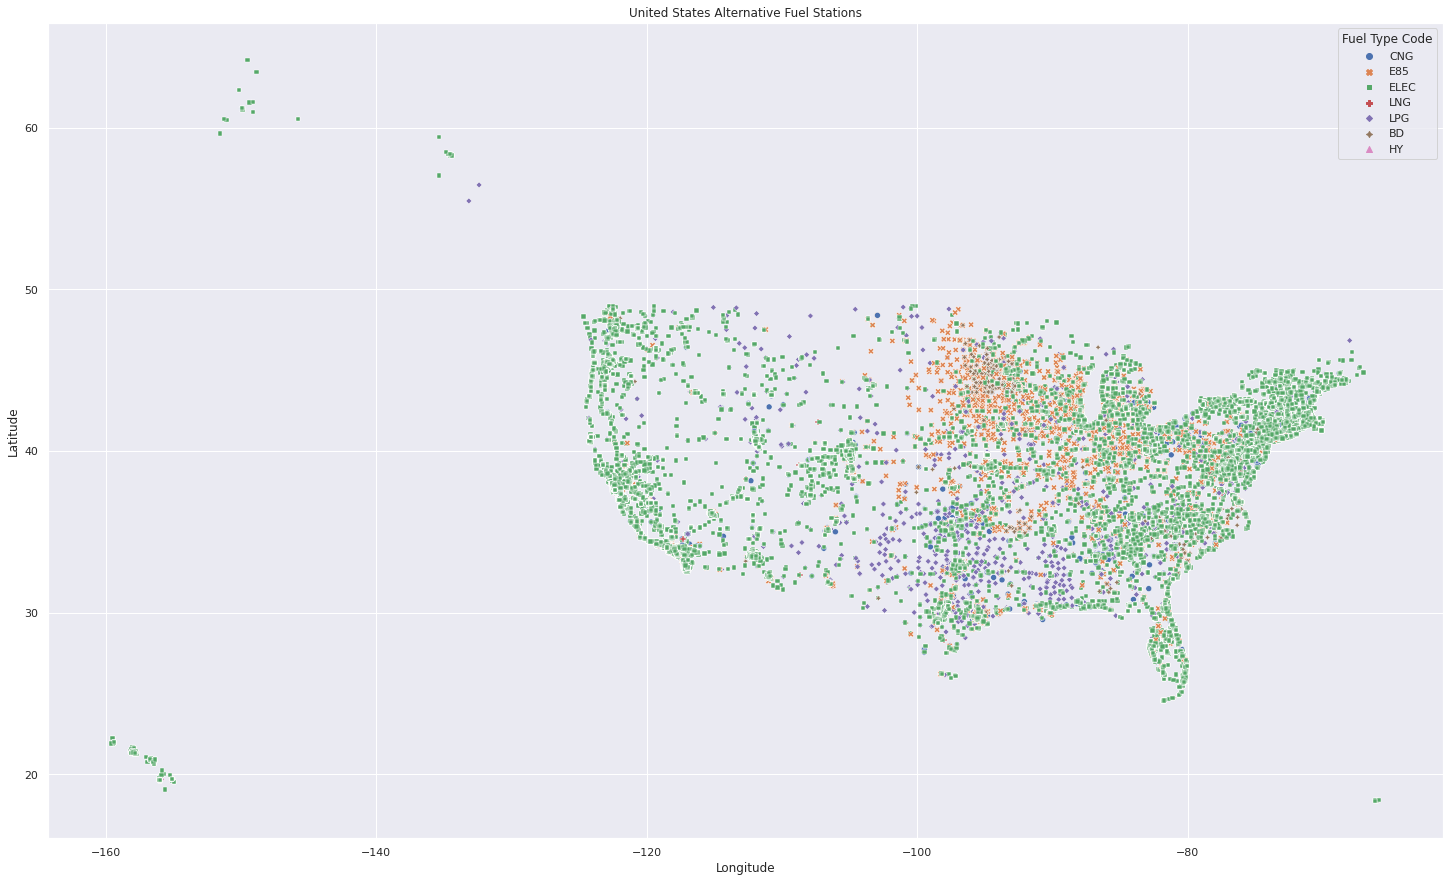

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
usa = df[df['Longitude'] < -20] # removes some outliers that had incorrect coordinates
tmp = sns.scatterplot(data=usa, x='Longitude', y='Latitude', hue='Fuel Type Code', style='Fuel Type Code')
tmp.set_title('United States Alternative Fuel Stations')
tmp.set_ylabel('Latitude')
tmp.set_xlabel('Longitude')
plt.show()

Lots of E85 in the midwest.. Seems kind of corny, but it makes sense given what we know about the agriculture there. Also LPG prevelance around Texas which would correspond to the production and pipeline infrastucture in that region. Considering electric stations, it seems that they are much more common in more densely populated regions like the Northeast and West coast.

Bonus plots for CA and NY, the two states with the most electric charging stations.

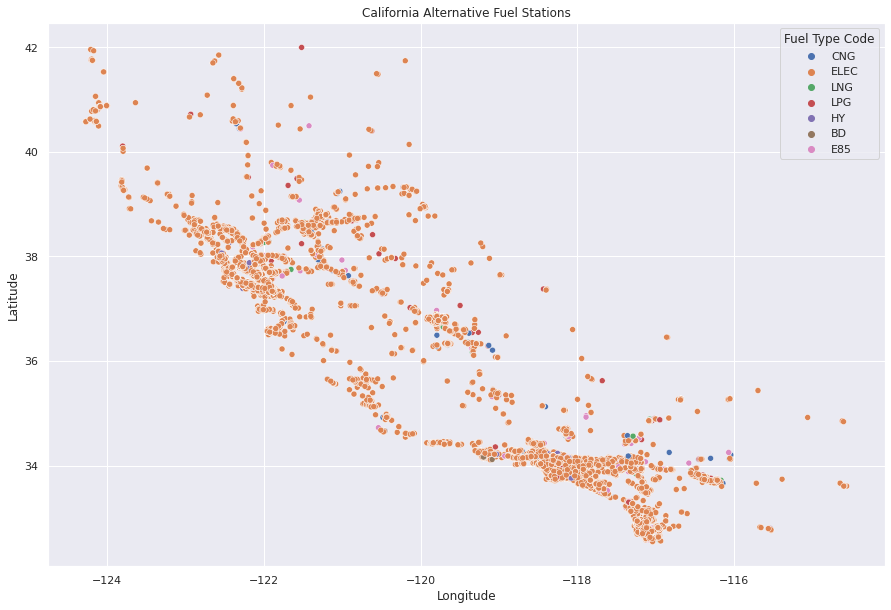

In [ ]:
cali = df[df['State'] == 'CA']
cali = cali[cali['Longitude'] < -90] # removes some outliers that had incorrect coordinates
sns.set(rc = {'figure.figsize':(15,10)})
tmp = sns.scatterplot(data=cali, x='Longitude', y='Latitude', hue='Fuel Type Code')
tmp.set_title('California Alternative Fuel Stations')
tmp.set_ylabel('Latitude')
tmp.set_xlabel('Longitude')
plt.show()

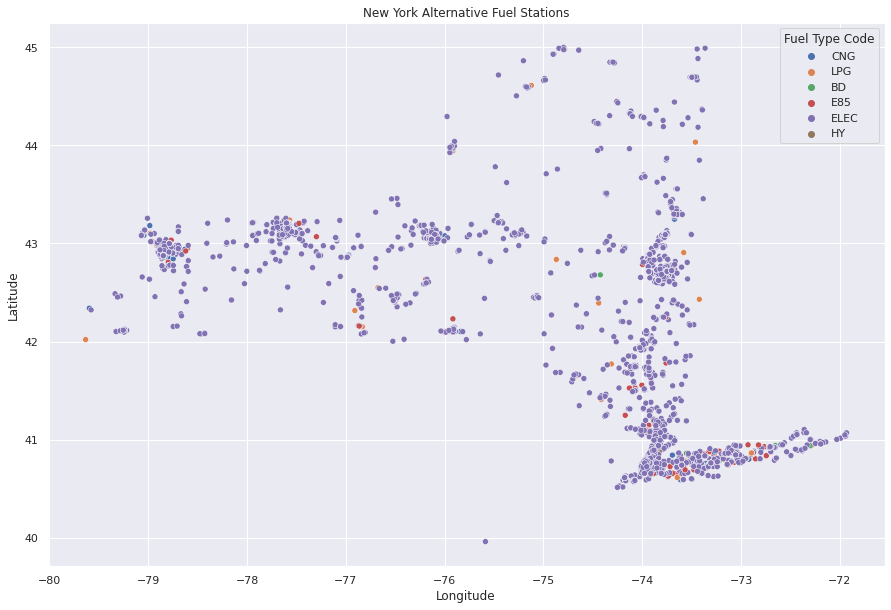

In [ ]:
bigapple = df[df['State'] == 'NY']
bigapple = bigapple[bigapple['Longitude'] < -10] # removes some outliers that had incorrect coordinates
sns.set(rc = {'figure.figsize':(15,10)})
tmp = sns.scatterplot(data=bigapple, x='Longitude', y='Latitude', hue='Fuel Type Code')
tmp.set_title('New York Alternative Fuel Stations')
tmp.set_ylabel('Latitude')
tmp.set_xlabel('Longitude')
plt.show()

## Plot 2 - State wise total charging stations accessed to public and private

In [ ]:
access_info = electric_stations.copy()
access_info= pd.get_dummies(data=access_info, columns=['Access Code'])
access_info = access_info.loc[:, ['State', 'Access Code_private', 'Access Code_public']]
access_info = access_info.groupby(['State'],as_index=False).sum()
access_info

State  Access Code_private  Access Code_public
0     AK                  2.0                38.0
1     AL                 77.0               192.0
2     AR                 14.0               134.0
3     AZ                 40.0               771.0
4     CA                781.0             13287.0
5     CO                117.0              1409.0
6     CT                 67.0               460.0
7     DC                 40.0               238.0
8     DE                  9.0               105.0
9     FL                228.0              2306.0
10    GA                 74.0              1490.0
11    HI                 23.0               364.0
12    IA                 13.0               247.0
13    ID                 34.0               104.0
14    IL                115.0               900.0
15    IN                 45.0               301.0
16    KS                 31.0               454.0
17    KY                 13.0               169.0
18    LA                 19.0               140.0
19    MA                 94.0              1856.0
20    MD                125.0              1073.0
21    ME                 16.0               259.0
22    MI                 57.0               746.0
23    MN                 31.0               543.0
24    MO                 41.0               973.0
25    MS                 19.0                94.0
26    MT                  5.0                68.0
27    NC                112.0               942.0
28    ND                  3.0                56.0
29    NE                  4.0               158.0
30    NH                 20.0               136.0
31    NJ                105.0               617.0
32    NM                 13.0               166.0
33    NV                 19.0               415.0
34    NY                177.0              2682.0
35    OH                 67.0               808.0
36    OK                 28.0               271.0
37    ON                  0.0                 1.0
38    OR                 78.0               870.0
39    PA                 81.0              1026.0
40    PR                  0.0                 5.0
41    RI                 18.0               217.0
42    SC                 45.0               333.0
43    SD                  4.0                48.0
44    TN                 87.0               598.0
45    TX                119.0              2107.0
46    UT                 22.0               831.0
47    VA                126.0               910.0
48    VT                  9.0               311.0
49    WA                171.0              1547.0
50    WI                 25.0               450.0
51    WV                 17.0                89.0
52    WY                  6.0                59.0

From this, we can see that california has the highest number of charging stations both public and private.

Charging stations with public access are more in california, new york, florida, texas etc.,

Charging stations with private access are more in california, florida, new york, washington etc.,

Few states like Alaska, North Dakota have very few charging stations of both types. 

So, we see a need for more charging stations in most of the cities. Particularly, public access charging stations are very much required for more people to buy electric cars 

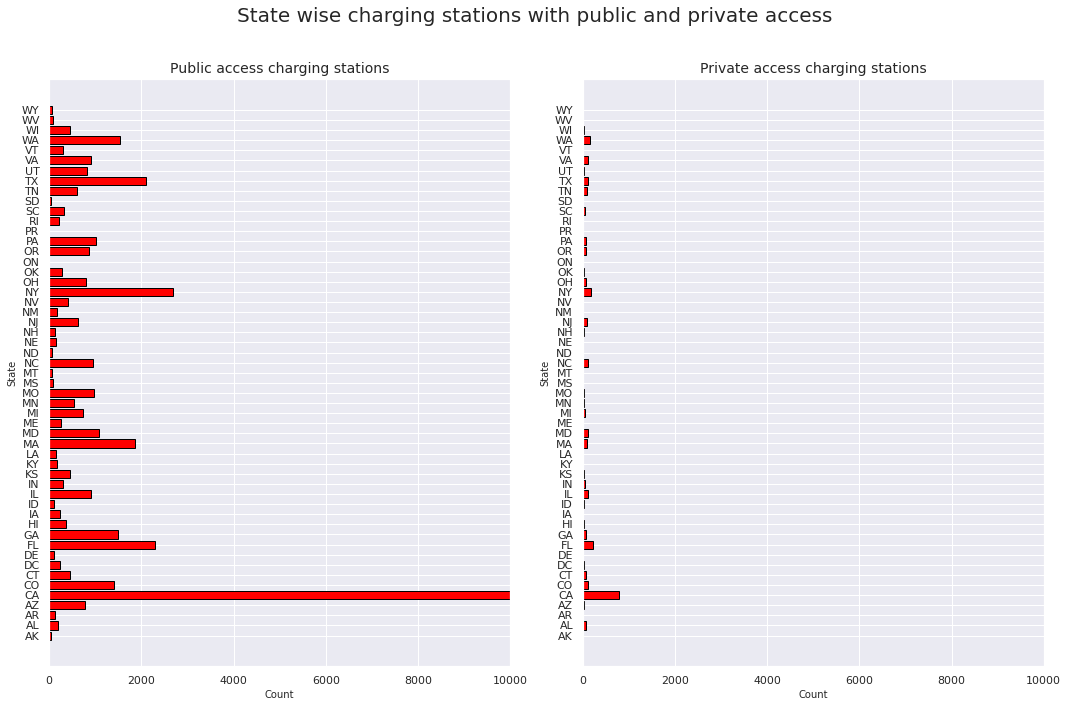

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

fig.suptitle("State wise charging stations with public and private access", fontsize=20)
axes[0].barh(access_info['State'], access_info['Access Code_public'], align='center', color='red', edgecolor='black')
axes[0].set_xlabel("Count", fontsize=10)
axes[0].set_ylabel("State",  fontsize=10)
axes[0].set_xlim(0,10000)
axes[0].set_title("Public access charging stations", fontsize=14)

axes[1].barh(access_info['State'], access_info['Access Code_private'], align='center', color='red', edgecolor='black')
axes[1].set_xlabel("Count", fontsize=10)
axes[1].set_ylabel("State",  fontsize=10)
axes[1].set_xlim(0,10000)
axes[1].set_title("Private access charging stations", fontsize=14)

# tight layout
fig.tight_layout()
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()


## Plot 3 - Station Type Breakdown
Despite the federal government's recent incentive program to help build out a comprehensive charging network, the electric vehicle charging network is not run by a "network czar." There are many participants within industry whose only guide is the invisible hand of demand. So let's take a look at who is participating in this industry and to what extent.  

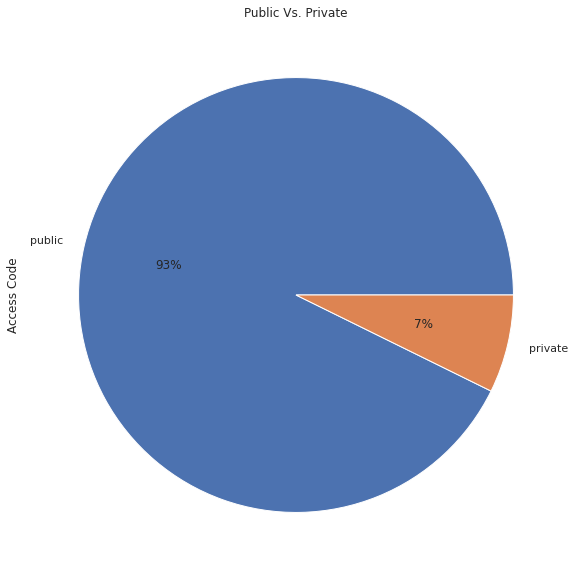

In [ ]:
publicVsPrivate = electric_stations["Access Code"].value_counts()
plot = publicVsPrivate.plot.pie(y='Access Code', autopct='%1.0f%%', title="Public Vs. Private")

Hearteningly, the vast majority of charging stations are open to the public. Now lets take a look at the split between free vs. not free. 

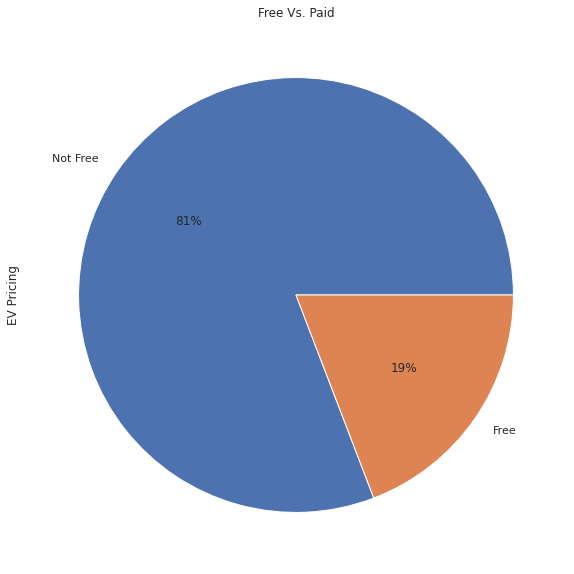

In [ ]:
freeVsNoteFree = electric_stations["EV Pricing"]
freeVsNoteFree[freeVsNoteFree != "Free"] = 'Not Free'
freeVsNoteFree = freeVsNoteFree.value_counts()
plot = freeVsNoteFree.plot.pie(y='EV Pricing', autopct='%1.0f%%', title="Free Vs. Paid")

The surprise here is that there is a considerable amount of free charging stations. Nothing is free these days but about 2 out of every 10 charging stations are free.

## Plot 4 - Which facility types have more charging stations

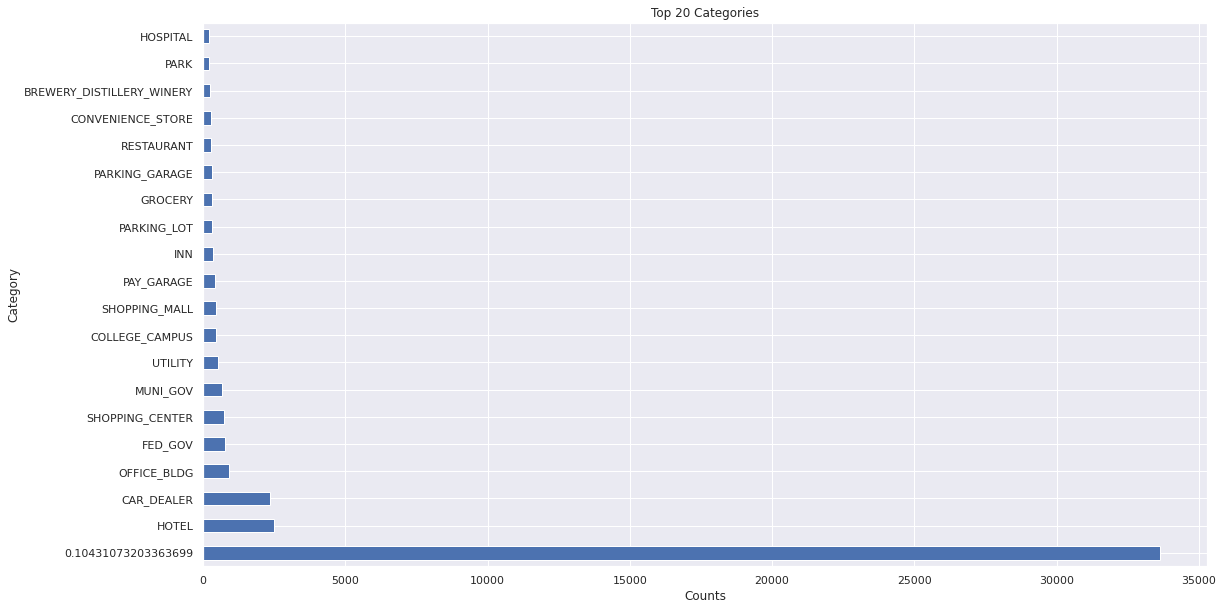

In [ ]:
electric_stations['Facility Type'].value_counts()[:20].plot(kind='barh',figsize=(18, 10))
plt.title('Top 20 Categories')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

## Plot 5 - Occupation and Foreign Population in Areas with a High Number of Stations

Later in the document, we locate outlier zip codes with the highest number of electric stations. In these areas, we want to look at the occupation mix among the population as well as the the origin of the foreign population in that region.

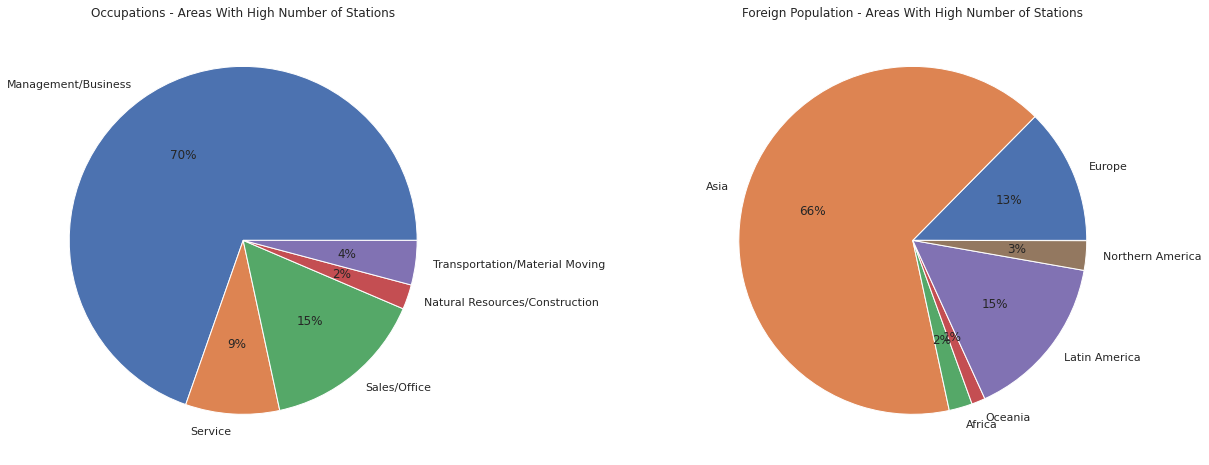

In [ ]:
# subsetting occupation data for our zip codes of interest
high = result[result['ZIP'].isin(['94025', '95054', '92618'])]
high = high.iloc[:,[6,7,8,9,10]]


# taking the average
tmp = high.agg('mean')

# creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8)) 

# First Plot - Occupation
mylabels = ["Management/Business", "Service", "Sales/Office", "Natural Resources/Construction","Transportation/Material Moving" ]
mycolors = ["r", "g", "b", "c"]
ax1.pie(tmp, labels=mylabels, autopct='%.0f%%')
ax1.set_title('Occupations - Areas With High Number of Stations')


# subsetting foreign population data for our zip codes of interest
high = result[result['ZIP'].isin(['94025', '95054', '92618'])]
high = high.iloc[:,[25, 26, 27, 28, 29, 30]]

# taking the average
tmp = high.agg('mean')

# Second Plot - Foreign Population
mylabels = ["Europe", "Asia", "Africa", "Oceania","Latin America", 'Northern America' ]
mycolors = ["r", "g", "b", "c", 'm', 'y' ]
ax2.pie(tmp, labels=mylabels, autopct='%.0f%%')
ax2.set_title('Foreign Population - Areas With High Number of Stations')

plt.show()

## Plot 6 - Electricity rates comparison

As we have seen from the plots above, there are quite a lot more charging stations compared to other fuel types. Since the price of electricity is cheaper compared to that of fuel, people are more inclined to buying EV's. 
We will check the electricity rate per unit in different states and see how they compare.

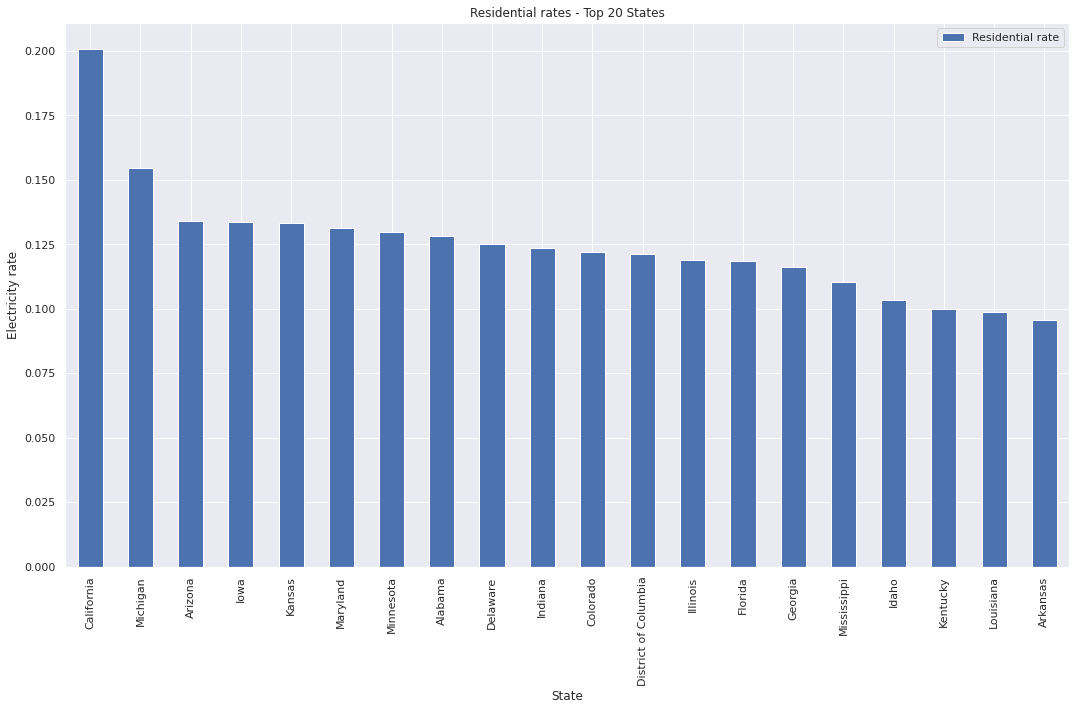

In [ ]:
Price_comp = result[['state_name', 'ZIP', 'Residential rate']] 

Price_comp.groupby('state_name').mean()[:20].sort_values(by=['Residential rate'], ascending=False).plot(kind='bar', figsize=(18, 10))
plt.title('Residential rates - Top 20 States')
plt.xlabel('State')
plt.ylabel('Electricity rate')
plt.show()

As expected, California has the highest rate per unit in the US followed by Michigan.

## Plot 7 - Total number of stations based on the fuel code

Vehicles have/use different types of fuels. Using this plot, we try to visualize the comparison of total stations for different fuel types.

It shouldn't be a wonder if we see more ELEC stations compared to the others.

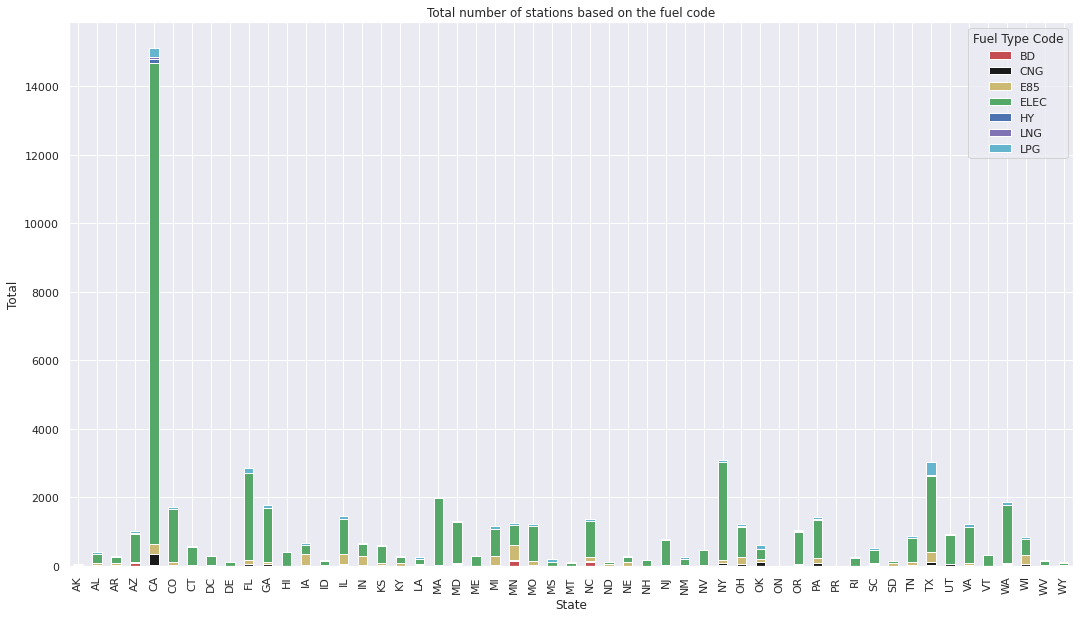

In [ ]:
p7 = df.groupby(['State','Fuel Type Code']).size().unstack()
p7.plot(kind='bar', stacked=True, figsize=[18,10], ylabel='Total', color='rkygbmc', title = 'Total number of stations based on the fuel code')
plt.show()

In [ ]:
# Install a new module to colab
!pip install datapane

import datapane as dp
import altair as alt
alt.data_transformers.disable_max_rows()

import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()

## Plot 8 - Which city and state have the most charging stations?

Now that we know that ELEC charging stations are more than the other types, we will see what locations have the most charging stations in the US.

In [ ]:
result1 = result.sort_values(by=['num_stations'], ascending=True)

state_list = list(result1['state_name'].unique())

input_dropdown = alt.binding_select(options=state_list)

selection = alt.selection_single(fields=['state_name'], bind=input_dropdown, name='state_name')

for State in state_list:
    fig.add_trace(
        go.Bar(
            x = result1['city'][result1['state_name']==State],
            y = result1['num_stations'][result1['state_name']==State],
            name = State, visible = True
        )
    )

buttons = []

for i, State in enumerate(state_list):
    args = [False] * len(state_list)
    args[i] = True
    
    button = dict(label = State,
                  method = "update",
                  args=[{"visible": args}])
    
    buttons.append(button)

We can choose a particular state

In [ ]:
fig.update_layout(
    updatemenus=[dict(
                    active=0,
                    type="dropdown",
                    buttons=buttons,
                    x = 0,
                    y = 1.1,
                    xanchor = 'left',
                    yanchor = 'bottom'
                )], 
    autosize=False,
    width=1000,
    height=800
)

##Plot 9 and 10 Map of Electric Charging Stations
Below you will find a map of all the Zip codes in the lower 48 states that contain at least one electric charger. If you have an electric car you would need to consult this map to determine your route across the states. I-70 runs through the middle of the country from Denver to Kansas city. By my estimatation, Denver (Lat ~40 Long ~105) can be identified by the cluster of dots in the on the western edge of the "charger desert," on the other side of this desert is Kansas city: a little more than 600 miles away. As it stands, you cannot drive an electric car on I-70 from start to finish as the longest range production car is currently the Lucid AIR with a range of 500 miles. You can take I-80 from the east coast to the west coast as proven by the consistent smattering of dots along the dakotas. 

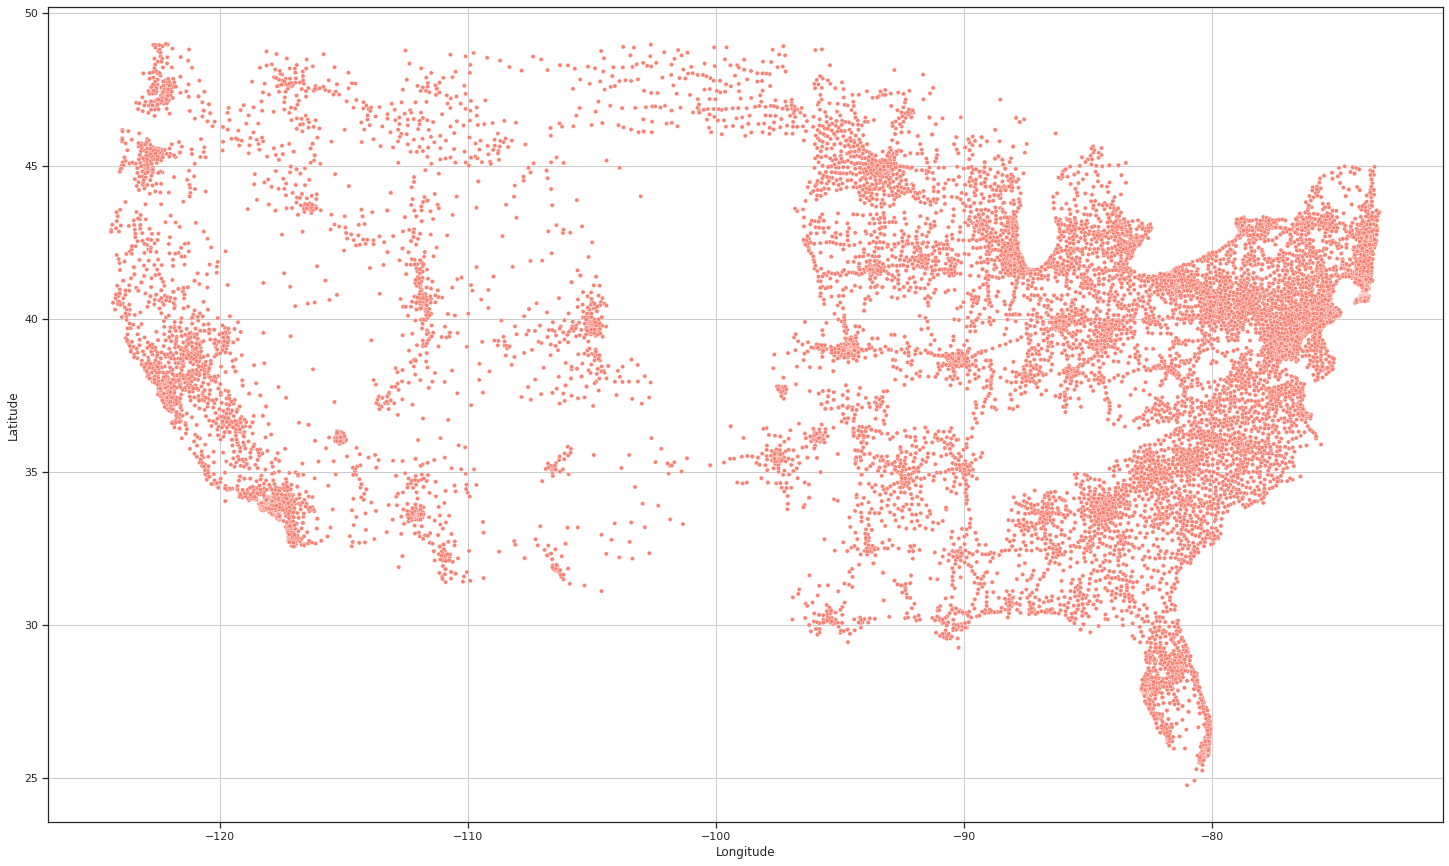

In [ ]:
sns.set(rc = {'figure.figsize':(25,15), 'figure.facecolor':'white', 'axes.facecolor':'white'})
sns.set(style='ticks')
usaBubbles = result
tmp = sns.scatterplot(data=usaBubbles, x='LNG', y='LAT', legend=False, color="salmon", size=20)
tmp.set_ylabel('Latitude')
tmp.set_xlabel('Longitude')
plt.grid()
plt.show()

A Zip code merely having a charging station does not mean that residents could viably daily an electric vehicle. So below you will find a map of zip codes that have a charger, where each point is sized by the number of chargers and it is sized by the population. The larger the circle the more charging stations, the darker the circle the more people. What jumps out to me immediately is what I guess to be a part of Houston, (Lat ~30,  Long ~95). This is a very dense place with not many chargers. 

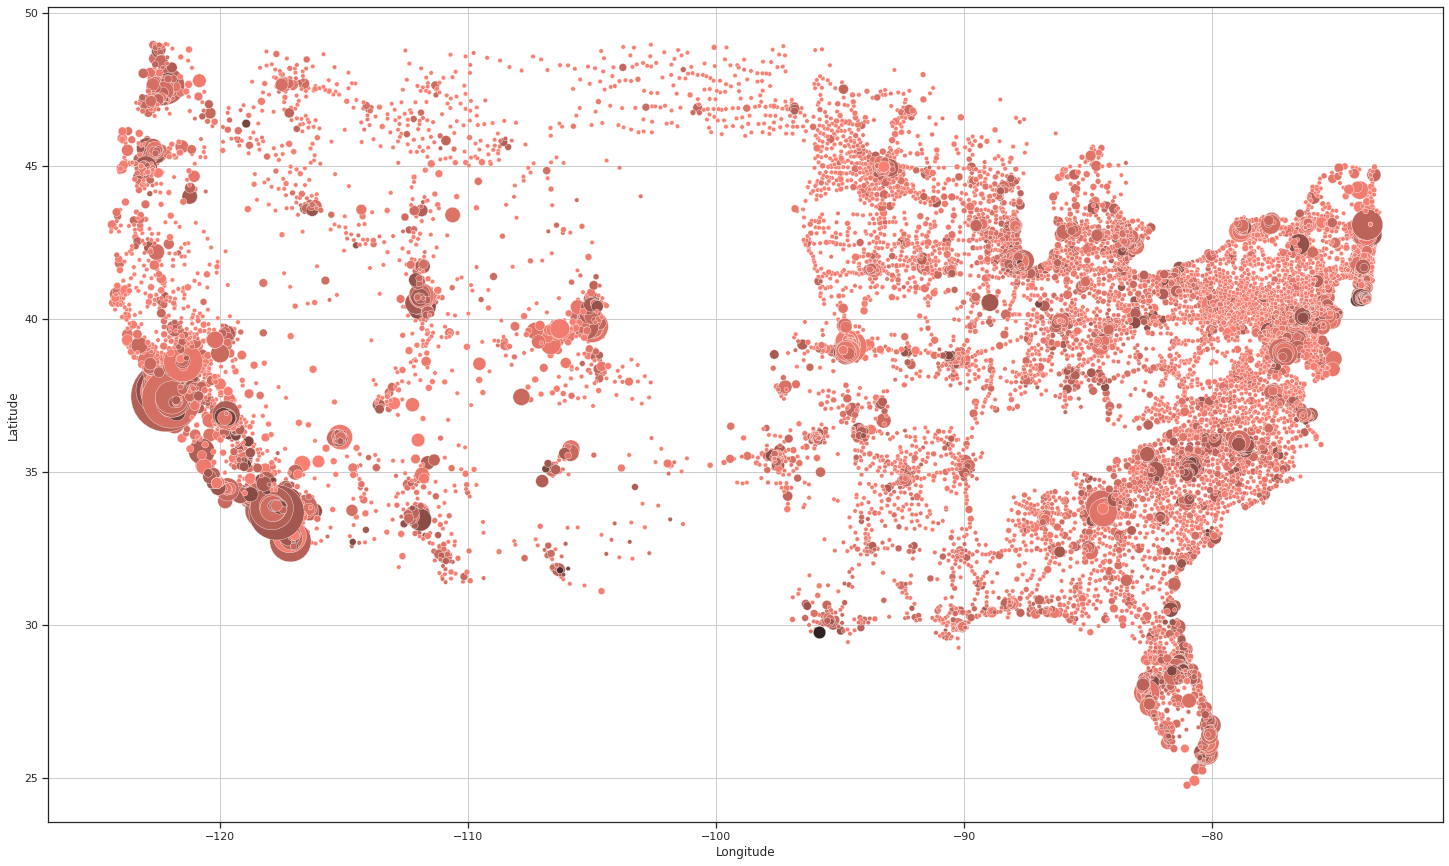

In [ ]:
sns.set(rc = {'figure.figsize':(25,15), 'figure.facecolor':'white', 'axes.facecolor':'white'})
sns.set(style='ticks')
usaBubbles = result 
tmp = sns.scatterplot(data=usaBubbles, x='LNG', y='LAT', size='num_stations', legend=False, sizes=(20, 5000), hue='Population', palette="dark:salmon_r")
tmp.set_ylabel('Latitude')
tmp.set_xlabel('Longitude')
plt.grid()
plt.show()

# EDA - Tables

## Table 1 - States with high number of car accidents in US

From this table, we can see that most accidents are hapening in Florida and california. Particularly, cities like Miami, Orlando encountered high car accidents.We know that florida is a popular tourist spot for people across the globe. Many people travel to this state. 

Also, percentage of people driving alone is high whereas the percent of people walking and using public transportation is very low in these cities.

The mean household income of the people in these areas is above 50k dollars. 

All these factors could have an impact on such high number of accidents in these places.

In [ ]:
accidents_data = result.sort_values(by="total_accidents", ascending=False)
accidents_data.reset_index()
accidents_data = accidents_data.loc[:, ['ZIP','State', 'city', 'total_accidents','Mean', 'Drove alone', 'Walked','Public transportation']]
accidents_data = accidents_data.head(20)
accidents_data


ZIP State             city  total_accidents      Mean  Drove alone  \
6123   33186    FL            Miami           3413.0   80474.0     0.781438   
5970   32819    FL          Orlando           2890.0  102150.0     0.781438   
6096   33155    FL            Miami           2555.0   67759.0     0.781438   
5962   32809    FL          Orlando           2388.0   52672.0     0.781438   
5989   32837    FL          Orlando           2287.0   70590.0     0.781438   
6103   33165    FL            Miami           2241.0   59662.0     0.781438   
5990   32839    FL          Orlando           2079.0   45935.0     0.781438   
13906  91761    CA          Ontario           2020.0   73869.0     0.735062   
6107   33169    FL            Miami           1980.0   56333.0     0.781438   
6120   33183    FL            Miami           1950.0   67341.0     0.781438   
6110   33173    FL            Miami           1918.0   79228.0     0.781438   
6092   33147    FL            Miami           1911.0   37854.0     0.781438   
6098   33157    FL            Miami           1851.0   78630.0     0.781438   
6104   33166    FL            Miami           1762.0   73419.0     0.781438   
6106   33168    FL            Miami           1750.0   49150.0     0.781438   
6101   33161    FL            Miami           1733.0   46384.0     0.781438   
6102   33162    FL            Miami           1652.0   54739.0     0.781438   
14120  92407    CA   San Bernardino           1632.0   65035.0     0.735062   
13900  91748    CA  Rowland Heights           1519.0   82594.0     0.735062   
6094   33150    FL            Miami           1501.0   37964.0     0.781438   

         Walked  Public transportation  
6123   0.015719               0.015913  
5970   0.015719               0.015913  
6096   0.015719               0.015913  
5962   0.015719               0.015913  
5989   0.015719               0.015913  
6103   0.015719               0.015913  
5990   0.015719               0.015913  
13906  0.025614               0.051836  
6107   0.015719               0.015913  
6120   0.015719               0.015913  
6110   0.015719               0.015913  
6092   0.015719               0.015913  
6098   0.015719               0.015913  
6104   0.015719               0.015913  
6106   0.015719               0.015913  
6101   0.015719               0.015913  
6102   0.015719               0.015913  
14120  0.025614               0.051836  
13900  0.025614               0.051836  
6094   0.015719               0.015913

##Table 2 - Outlier Zip Codes
Let us have a look at some strange zip codes. 

In [ ]:
csPerPersonZip = result[["State", "ZIP", "Population", "num_stations"]]
csPerPersonZip['Per Person'] = np.where(csPerPersonZip['Population'] * csPerPersonZip['num_stations'] != 0, #if this is true then either population or stations is 0, 
                              csPerPersonZip['num_stations']/csPerPersonZip['Population'], 0)
csPerPersonZip[(csPerPersonZip["Population"] == 0) & (csPerPersonZip["num_stations"] > 0)]

State    ZIP  Population  num_stations  Per Person
2609     PA  18936         0.0           3.0         0.0
5983     FL  32830         0.0           4.0         0.0
14434    CA  93519         0.0           1.0         0.0

This is an interesting table because it shows use 3 zip codes that have charging stations but has no population.

**18936** is a tiny zip code about 35 minutes outside of Philadelpia PA is a very dense area of the state but with no residential lots it has no permanent residents. 

**32830** is Disney's Saratoga springs resort and spa. The zip code has no perminent residents but it does have many visitors. 

**93519** is in the California Sierra Nevadas, it is north of Yosemite national park, which may explain the need for a charger. It has one road that goes through it, but being mostly mountain and national forest there are no people. 

In [ ]:
csPerPersonZip.sort_values(by="num_stations", ascending=False).head(3)

State    ZIP  Population  num_stations  Per Person
14579    CA  94025     43996.0         366.0    0.008319
14787    CA  95054     23959.0         257.0    0.010727
14174    CA  92618     54509.0         223.0    0.004091

The first three zip codes may have had more chargers than people, but these three zip codes have the most chargers. Interestingly, they are all in California. 

**94025** The Zip code with the most stations is Menlo Park, famously known as the home of Facebook but also Tesla along with many other silicon valley giants.

**95054** A short drive away from Menlo park is Santa clara where more silicon valley giants are headquartered along with Levi's Stadium

**92618** 6+ hours away from the first two, is the zip code that boast the 3rd most chargers: Irvine California. This zip code has a couple large crowd draws: a sports complex and an amusement park. 

## Table 3 - Commute Modes in High and Low States

In this table we want to investigate if there is a difference in the way people get to work in states with the most charging stations versus states with the least charging stations.

In [ ]:
# Subsetting columns and aggregating charging stations by state
tmp1=result.iloc[:,[4, 31]]
tmp1=tmp1.groupby(['state_id']).sum()

# Subsetting columns and aggregating commute modes by state
tmp2=result.iloc[:,[4, 43,44,45,46,47,48,49]]
tmp2=tmp2.groupby(['state_id']).mean()

#Joining it together
tmp = pd.merge(tmp1,tmp2, left_on='state_id', right_on='state_id')

# Subsetting the states with 10 most and 10 least amount of stations 
tmp1 = tmp.nlargest(10,['num_stations'])
tmp2 = tmp.nsmallest(10,['num_stations'])

# averaging the commute mode %s
high=pd.DataFrame(data=tmp1.agg('mean'))
high=high.rename(columns={0:'Average'})

# averaging the commute mode %s
low=pd.DataFrame(data=tmp2.agg('mean'))
low=low.rename(columns={0:'Average'})

# joining together to compare
comp=pd.merge(high,low, left_index=True, right_index=True)
comp=comp.rename(columns={'Average_x':'Average (High)', 'Average_y':'Average (Low)'})
comp

Average (High)  Average (Low)
num_stations                   2547.200000      73.200000
Bicycle                           0.005015       0.004560
Carpool                           0.086308       0.092268
Drove alone                       0.744940       0.805306
Public transportation             0.060054       0.009100
Taxi, motorcycle, or other        0.014508       0.011654
Walked                            0.026544       0.025993
Worked at home                    0.062631       0.051119

Expected a larger variance in commute method than we ended up with. The largest difference here is that in states with a lot of charging stations, people utilize public transportation instead of driving alone.

## Table 4 - Correlation of Heating Sources with Number of Charging Stations

We wanted to see if any home/building heating sources are correlated with the number of stations. Perhaps the energy production and infrastructure of an area could effect if there are electric stations and how many.

In [ ]:
# Subsetting heat source data and number of charging stations
tmp=result.iloc[:,[31, 50, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

# Making a correlation matrix
tmp=tmp.corr()

# putting it in a data frame and trimming to only display data of interest
tmp=pd.DataFrame(data=tmp.iloc[2:,[0,1]])

tmp

num_stations  is_electric
heatsource_percent_utility_gas                 0.147702     0.278212
heatsource_percent_bottled_tank_or_lp_gas     -0.169792    -0.330166
heatsource_percent_electricity                 0.021501     0.034536
heatsource_percent_fuel_oil_kerosene_etc      -0.093222    -0.132844
heatsource_percent_coal_or_coke               -0.058320    -0.127309
heatsource_percent_wood                       -0.129747    -0.235295
heatsource_percent_solar_energy                0.028045     0.027413
heatsource_percent_other_fuel                 -0.063913    -0.120208
heatsource_percent_no_fuel_used                0.137682     0.132431

We expected to see some stronger correlations, but the key takeaway here is whether the correlation is positive or negative. For example, we see the strongest negative correlation with LP gas. Based on the map of alternative fuel stations, we see the popularity of LP gas around Texas where there is a lot of production and pipelines. The strongest positive correlation is with utility gas. This is not as interesting because it is likely a result of the prevalence of natural gas as a heating source in a few key areas such as New York and California.

## Table 5 - Highest and Lowest Residential Electricity Rates

This table shows the 5 states with the highest residential electricity rates along with the 5 lowest. Additionally, it shows the number of charging stations in each state. The though behind this was that there might be a relationship between the price of electricity and the amount of charging stations.

In [ ]:

# 5 highest state residential electricity rates
tmp=result.iloc[:,[4, 40]]
tmp=tmp.groupby(['state_id']).mean()
tmp=tmp.nlargest(5,['Residential rate'])

#number of stations by state
tmp1=result.iloc[:,[4, 31]]
tmp1=tmp1.groupby(['state_id']).sum()

# 5 lowest state residential electricity rates
tmp2=result.iloc[:,[4, 40]]
tmp2=tmp2.groupby(['state_id']).mean()
tmp2=tmp2.nsmallest(5,['Residential rate'])

#putting it together
tmp=tmp.append(tmp2)
tmp=pd.merge(tmp,tmp1,left_index=True, right_index=True, how='inner')
tmp

Residential rate  num_stations
state_id                                
CA                0.200854       11827.0
NY                0.160069        2866.0
MI                0.154704         650.0
WI                0.138787         537.0
PA                0.134259        1296.0
TN                0.092861          52.0
AR                0.095719         176.0
OK                0.097366         235.0
ND                0.097427          38.0
LA                0.098678         127.0

There are significantly more charging stations in states with the highest residential electricity rates when compared to states with the lowest. Certainly other factors are at play here, size, population and major industry just to name a few. One assumption that could be made is that it may be more cost effective to charge at a station versus at home in states where electricity is expensive.

## Table 6 - Comparing Urban and Rural Incomes with Number of Charging Stations

We have some nice data that breaks population out into urban and rural portions. We want to compare the income in these areas as well as the number of charging stations.

In [ ]:
#subsetting 'urban' areas
urban=result[result['urban_rural-percent-urban_population-of-total_population'] >= result['urban_rural-percent-urban_population-of-total_population'].median()]

# selecting the columns we want
urban=pd.DataFrame(data=urban.iloc[:,[32,31]])

#producing summary statistics
urban=urban.agg(func=['mean','std', 'min', 'max'], axis=0)
urban = urban.rename(columns={'Mean':'Urban Income'})

#subsetting 'rural' areas
rural=result[result['urban_rural-percent-urban_population-of-total_population'] < result['urban_rural-percent-urban_population-of-total_population'].median()]

# selecting the columns we want
rural=pd.DataFrame(data=rural.iloc[:,[32,31]])

#producing summary statistics
rural=rural.agg(func=['mean','std', 'min', 'max'], axis=0)
rural = rural.rename(columns={'Mean':'Rural Income'})

#putting it together
income=pd.merge(urban,rural, left_index=True, right_index=True)

#renaming for clarity
income = income.rename(columns={'num_stations_x':'Urban Stations','num_stations_y':'Rural Stations'})
income

Urban Income  Urban Stations   Rural Income  Rural Stations
mean   73027.452048        4.137870   59033.861969        0.348684
std    31477.122865       10.234712   18958.936482        1.129982
min      439.000000        0.000000     413.000000        0.000000
max   361842.000000      366.000000  339449.000000       22.000000

Urban areas are higher in both average income and the average number of stations when compared to rural. However, there is also significantly more variance in these numbers for Urban areas. This sheds light on the diversity of ubran areas.

##Table 7: Density of Chargers in Residential Zip Codes

In [ ]:
perThousand = csPerPersonZip.where(csPerPersonZip["Population"] > 2)
perThousand = perThousand.where(perThousand["num_stations"] > 1)
perThousand["Chargers Per 1000 People"] = perThousand['Per Person'] * 1000.0
perThousand = perThousand.dropna()
perThousand = perThousand.sort_values(by="Per Person", ascending=False)
perThousand.shape

(4421, 6)

In [ ]:
perThousand[perThousand['Chargers Per 1000 People'] > 100.0]

State    ZIP  Population  num_stations  Per Person  \
14604    CA  94128       173.0         124.0    0.716763   
14097    CA  92364         5.0           2.0    0.400000   
10057    MN  55450         7.0           2.0    0.285714   
3095     MD  21031        26.0           6.0    0.230769   

       Chargers Per 1000 People  
14604                716.763006  
14097                400.000000  
10057                285.714286  
3095                 230.769231

Of Any Zip Code that has a residential population these 4 zip codes have the most chargers per 1000 people. Once again these are likely very unusal zip codes. 

**94128** is the San Francisco Airport, it is surprising to me there is anyone "living" in this ZIP code. 

**92364** is in the Mojave National Preserve, it has a Tesla Supercharger and is on the route between LA and Las Vegas

**55450** Surprise! Another Airport: Minneapolis St. Paul. Again, from google maps it does not look as though there is any residential housing in this zip code. 

**21031** This ZIP code is just an industrial/commercial complex, no one single entity is taking up the entire zip code. 

In [ ]:
perThousand[perThousand['Chargers Per 1000 People'] > 3.0].shape

(129, 6)

With approximately 3% of zip codes having a density of more than 3 chargers per 1000 people, it is safe to say, that if we were to individually investigate each of these zip codes we would find a lot of single use zip codes: airports, sports complexes, deserts etc. For the analysis of the density of chargers per 1000 people we want to focus on residential areas (i.e. where people live). 

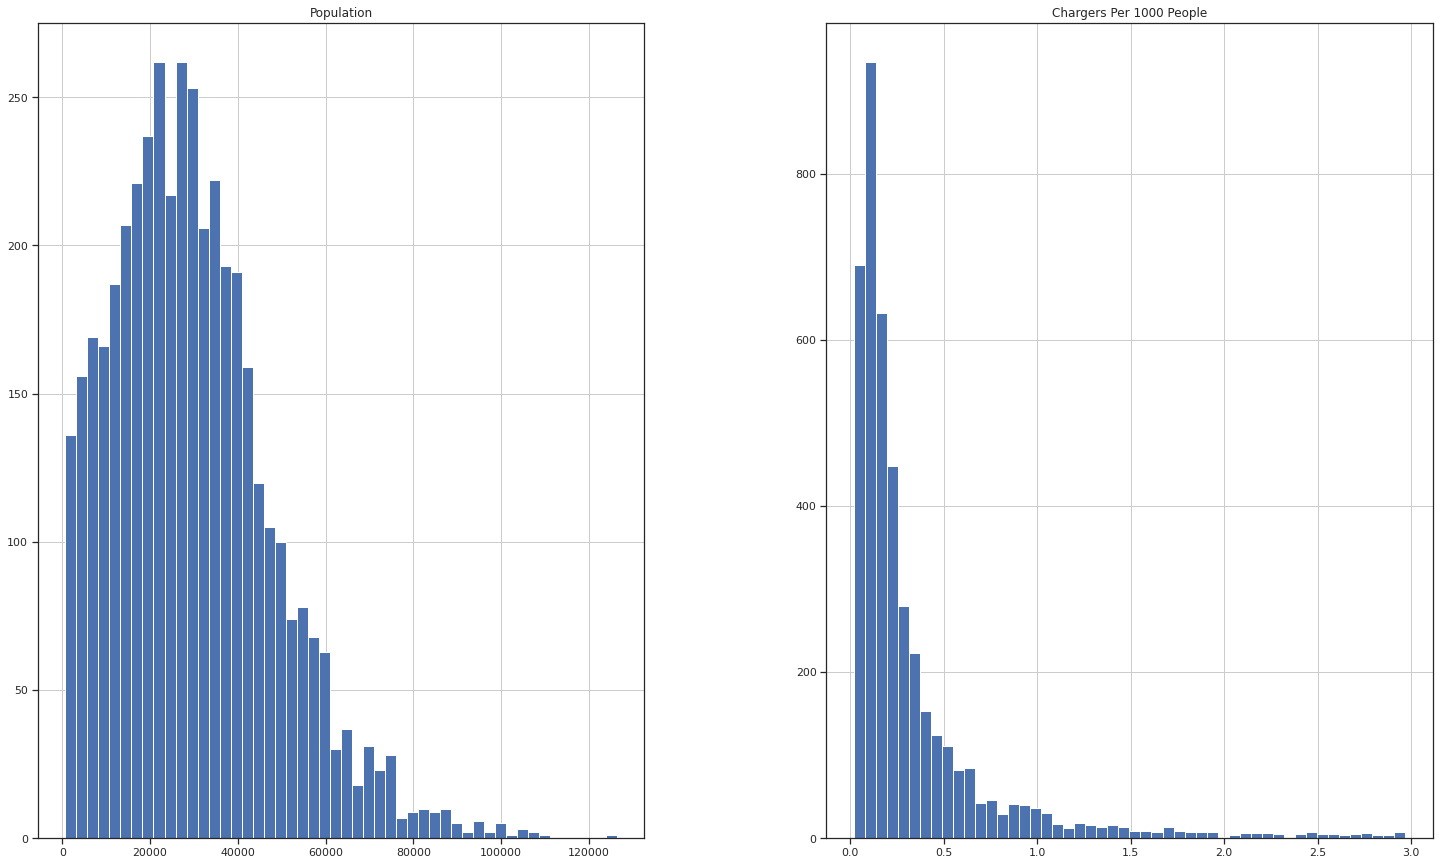

In [ ]:
subPerThousand = perThousand[perThousand['Chargers Per 1000 People'] < 3.0]
subPerThousand = subPerThousand[['Population', 'Chargers Per 1000 People']]
hist = subPerThousand.hist(bins=50)

## Table 8 - Count of Fuel Types (State-wise)

We will see th

In [ ]:
pd.set_option('display.max_rows', 1000)
print(df.groupby(['State','Fuel Type Code']).agg({'Fuel Type Code':'count'}))

                      Fuel Type Code
State Fuel Type Code                
AK    CNG                          1
      ELEC                        40
      LPG                          3
AL    BD                          10
      CNG                         31
      E85                         33
      ELEC                       269
      LNG                          3
      LPG                         68
AR    BD                          17
      CNG                         16
      E85                         66
      ELEC                       148
      LNG                          2
      LPG                         35
AZ    BD                          76
      CNG                         31
      E85                         22
      ELEC                       811
      HY                           1
      LNG                          7
      LPG                         75
CA    BD                          23
      CNG                        330
      E85                        274
 

## Table 9 Target Variable Describe
Our target variable is the number of stations inside a zip code. Before we try any modeling we must take a look at the distribution of the values of our target variable. Below we see a table of the mean number of stations per zip code, along with the standard deviation and the quartiles. What jumps out to me from this table is that the bottom two quartiles have a value of 0 stations. This means that the majority of zip codes have no electric charging stations but there are a minority of zip codes that have many charging stations that brings up the average. 

In [ ]:
result["num_stations"].describe()

count    15839.000000
mean         2.246985
std          7.529987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        366.000000
Name: num_stations, dtype: float64

## Table 10 - Average charging price per Kwh in states and Maximum charging price per Kwh across cities in US

States like connecticut, Delaware, etc., have high average price than other countries.

California has high number of charging stations and minimum price for charging so it is good option for anyone in california to buy an electric car.

In [ ]:
price_info =electric_stations.loc[:,['State', 'Charging Price']]
price_info = price_info.groupby('State').mean().sort_values(by=['Charging Price'], ascending=False)

price_info[:10]


Charging Price
State                
CT           7.713567
WY           0.393538
DE           0.274737
KY           0.176154
HI           0.168721
OR           0.151886
MT           0.124247
OK           0.118829
IA           0.114192
AZ           0.111976

New Have, Chrisitian, Friendswood, Reedville cities have high charging price compared to other cities. in US

In [ ]:
price_info_city =electric_stations.loc[:,['City', 'Charging Price']]
price_info_city = price_info_city.groupby('City').mean().sort_values(by=['Charging Price'], ascending=False)
price_info_city[:20]

Charging Price
City                            
New Haven             118.896765
Christiana             30.000000
Friendswood             5.081667
Reedville               5.000000
Lander                  5.000000
Dubois                  5.000000
Houlton                 5.000000
Fort Lawn               5.000000
Cedar Falls             4.166667
Floyd                   3.333333
Hebron                  3.333333
Happy Valley            2.870000
Bigfork                 2.500000
The Woodlands           2.345385
Christmas Valley        2.000000
Oak Brook               1.764706
Fancy Gap               1.750000
Petersburg              1.666667
Cody                    1.666667
Hampton Bays            1.665000

# Data Modeling - Regression

In [ ]:
result = result.select_dtypes(exclude=['object'])

result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15839 entries, 0 to 15838
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   LAT                                                           15839 non-null  float64
 1   LNG                                                           15839 non-null  float64
 2   occupation_percent_mgmt_business_science_art                  15839 non-null  float64
 3   occupation_percent_service                                    15839 non-null  float64
 4   occupation_percent_sales_and_office                           15839 non-null  float64
 5   occupation_percent_natrualresources_construction_maintenance  15839 non-null  float64
 6   occupation_percent_transportation_materialmoving              15839 non-null  float64
 7   heatsource_percent_utility_gas                                15839

## Data Splitting

In [ ]:
# Data splitting
X = result.drop(['num_stations','is_electric'], axis=1) #drop the target
y = result['num_stations'] #target variable
seed = 21 # Group ID

# split!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = seed)

## Min/Max Scaling

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

## Model 1

In [ ]:
# make a variable to store the general model
Model1R = LinearRegression()
Model1R = Model1R.fit(X_train, y_train) 

In [ ]:
# store the predictions
train_preds_1R = Model1R.predict(X_train) 
test_preds_1R = Model1R.predict(X_test)

## Model 2

### Build Pipeline

In [ ]:
# Construct some pipelines
pipe_dt = Pipeline([('scl', StandardScaler()),
			('clf', DecisionTreeRegressor(random_state=seed))])

pipe_dt_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', DecisionTreeRegressor(random_state=seed))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestRegressor(random_state=seed))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', RandomForestRegressor(random_state=seed))])

pipe_gbr = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingRegressor(random_state=seed))])

pipe_gbr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', GradientBoostingRegressor(random_state=seed))])

pipe_svr = Pipeline([('scl', StandardScaler()),
			('clf', LinearSVR(random_state=seed))]) #LinearSVR

pipe_svr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', LinearSVR(random_state=seed))])  #LinearSVR with PCA
      
pipe_hgb = Pipeline([('scl', StandardScaler()),
			('clf', HistGradientBoostingRegressor(random_state=seed))])    #HistGradientBoostingRegressor
 
pipe_hgb_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', HistGradientBoostingRegressor(random_state=seed))]) 

### Define your Parameters for Grid Search




In [ ]:
# Set grid search params
param_range = [10, 15]

grid_params_dt_2R = [{
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range}]

grid_params_rf_2R = [{
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range}]

grid_params_svr_2R = [{
		'clf__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'clf__max_iter': [500, 1000]}]

grid_params_hgb_2R = [{
		'clf__min_samples_leaf': param_range, 
    	'clf__max_depth': param_range}]
  		
grid_params_gbr_2R = [{
		'clf__min_samples_leaf': param_range, 
    'clf__max_features': ['auto', 'log2']}]


### Define your Grid Search

In [ ]:
# Construct grid searches

gs_dt_2R = GridSearchCV(estimator=pipe_dt,
    param_grid=grid_params_dt_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_dt_pca_2R = GridSearchCV(estimator=pipe_dt_pca,
    param_grid=grid_params_dt_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_rf_2R = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_rf_pca_2R = GridSearchCV(estimator=pipe_rf_pca,
    param_grid=grid_params_rf_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_gbr_2R = GridSearchCV(estimator=pipe_gbr,
    param_grid=grid_params_gbr_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_gbr_pca_2R = GridSearchCV(estimator=pipe_gbr_pca,
    param_grid=grid_params_gbr_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_svr_2R = GridSearchCV(estimator=pipe_svr,
    param_grid=grid_params_svr_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_svr_pca_2R = GridSearchCV(estimator=pipe_svr_pca,
    param_grid=grid_params_svr_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_hgb_2R = GridSearchCV(estimator=pipe_hgb,
    param_grid=grid_params_hgb_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

gs_hgb_pca_2R = GridSearchCV(estimator=pipe_hgb_pca,
    param_grid=grid_params_hgb_2R,
    scoring='neg_mean_absolute_error',
    cv=10)

# List of pipelines for ease of iteration
grids = [gs_dt_2R, gs_dt_pca_2R, gs_rf_2R, gs_rf_pca_2R, gs_gbr_2R, gs_gbr_pca_2R, gs_svr_2R, gs_svr_pca_2R, gs_hgb_2R, gs_hgb_pca_2R ]


# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {
    0: 'Decision Tree', 1: 'Decision Tree w/PCA', 
  2: 'Random Forest', 3: 'Random Forest w/PCA',
  4: 'Gradient Boosting', 5: 'Gradient Boosting w/PCA',
  6: 'Support Vector Machine', 7: 'Support Vector Machine w/PCA',
  8: 'Histogram Gradient Boosting', 9: 'Histogram Gradient Boosting w/PCA'}

###  Find the best model

In [ ]:

# Fit the grid search objects
print('Performing model optimizations...')
best_err = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data error
	print('Best training error: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data error of model with best params
	print('Test set error score for best params: %.3f ' % mean_absolute_error(y_test, y_pred))
	# Track best (lowest test error) model
	if mean_absolute_error(y_test, y_pred) < best_err: 
		best_err = mean_absolute_error(y_test, y_pred)
		best_gs = gs
		best_clf = idx
	print('\nModel with best test set error: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Decision Tree
Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 15}
Best training error: -2.267
Test set error score for best params: 2.081 

Model with best test set error: Decision Tree

Estimator: Decision Tree w/PCA


KeyboardInterrupt: ignored

### Best Model

In [ ]:
Model2R = RandomForestRegressor(random_state=seed, max_depth=15, min_samples_leaf=10)
Model2R.fit(X_train, y_train)
test_preds_2R = Model2R.predict(X_test)
train_preds_2R = Model2R.predict(X_train)


## Model 3 - autoML

In [ ]:
# Construct and fit TPOT Regressor
start_time = time.time()
tpotr = TPOTRegressor(generations=2, population_size = 5, verbosity=2, scoring='neg_mean_absolute_error')
tpotr.fit(X_train, y_train)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpotr.score(X_test, y_test))

# Save best pipeline as Python script file
tpotr.export('ELEC_count_zipcode.py') # look left!

## Run the Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = result.copy()
# RENAME THE TARGET VARIABLE
tpot_data.rename(columns={'num_stations' : 'target'}, inplace=True)
features = tpot_data.drop(['target','is_electric'], axis=1)
target_y = tpot_data['target']
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, target_y, random_state=seed)

# Average CV score on the training set was: -2.018701726608095
Model3R = ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=10, min_samples_split=20, n_estimators=100)

Model3R.fit(training_features, training_target)
results = Model3R.predict(testing_features)
results1 = Model3R.predict(training_features)

In [ ]:
training_features = np.array(training_features)
testing_features = np.array(testing_features)
training_target = np.array(training_target)
testing_target = np.array(testing_target)

# Data Modeling - Classification

## Data Splitting

In [ ]:
# Data splitting
y_C = result['is_electric'] #target variable
seed = 21 

# split!
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X, y_C,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = seed)

## Min/Max Scaling

In [ ]:
X_train_C = np.array(X_train_C)
X_test_C = np.array(X_test_C)
y_train_C = np.array(y_train_C)
y_test_C = np.array(y_test_C)

In [ ]:
scaler = MinMaxScaler()
X_train_C = scaler.fit_transform(X_train_C)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test_C = scaler.transform(X_test_C)

In [ ]:
Counter(result['is_electric'])

Counter({0: 9413, 1: 6426})

## Model 1




In [ ]:
# make a variable to store the general model
Model1C = LogisticRegression()
Model1C = Model1C.fit(X_train_C, y_train_C) 

In [ ]:
# store the predictions
train_preds_1C = Model1C.predict(X_train_C) 
test_preds_1C = Model1C.predict(X_test_C)

## Model 2

### Build Pipeline

In [ ]:
# Construct some pipelines
pipe_knn = Pipeline([('scl', StandardScaler()),
			('clf', KNeighborsClassifier())])

pipe_knn_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', KNeighborsClassifier())])

pipe_dt = Pipeline([('scl', StandardScaler()),
			('clf', DecisionTreeClassifier(random_state=seed))])

pipe_dt_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', DecisionTreeClassifier(random_state=seed))])

pipe_gb = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingClassifier(random_state=seed))])

pipe_gb_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', GradientBoostingClassifier(random_state=seed))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_et = Pipeline([('scl', StandardScaler()),
			('clf', ExtraTreesClassifier(random_state=seed))])

pipe_et_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.99)),
			('clf', ExtraTreesClassifier(random_state=seed))])

### Define your Parameters for Grid Search


In [ ]:
# Set grid search params
grid_params_lr_2C = [{'clf__penalty': ['l1', 'l2'],
                  'clf__C': [1, 10]}]

grid_params_knn_2C = [{'clf__n_neighbors': [1, 3, 5, 10]}] 

grid_params_dt_2C = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [5, 10, 20, 25]}]

grid_params_gb_2C = [{'clf__n_estimators': [3, 5, 10, 15, 20],
                'clf__learning_rate': [0.001, 0.01]}]

grid_params_rf_2C = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [5, 10]}]

grid_params_et_2C = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [5, 25]}]

### Define your Grid Search

In [ ]:
# Construct grid searches

gs_knn_2C = GridSearchCV(estimator=pipe_knn,
    param_grid=grid_params_knn_2C,
    scoring='accuracy',
    cv=10) 
    
gs_knn_pca_2C = GridSearchCV(estimator=pipe_knn_pca,
    param_grid=grid_params_knn_2C,
    scoring='accuracy',
    cv=10)

gs_dt_2C = GridSearchCV(estimator=pipe_dt,
    param_grid=grid_params_dt_2C,
    scoring='accuracy',
    cv=10)
    
gs_dt_pca_2C = GridSearchCV(estimator=pipe_dt_pca,
    param_grid=grid_params_dt_2C,
    scoring='accuracy',
    cv=10)

gs_gb_2C = GridSearchCV(estimator=pipe_gb,
    param_grid=grid_params_gb_2C,
    scoring='accuracy',
    cv=10)

gs_gb_pca_2C = GridSearchCV(estimator=pipe_gb_pca,
    param_grid=grid_params_gb_2C,
    scoring='accuracy',
    cv=10)

gs_rf_2C = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf_2C,
    scoring='accuracy',
    cv=10)

gs_rf_pca_2C = GridSearchCV(estimator=pipe_rf_pca,
    param_grid=grid_params_rf_2C,
    scoring='accuracy',
    cv=10)

gs_et_2C = GridSearchCV(estimator=pipe_et,
    param_grid=grid_params_et_2C,
    scoring='accuracy',
    cv=10)

gs_et_pca_2C = GridSearchCV(estimator=pipe_et_pca,
    param_grid=grid_params_et_2C,
    scoring='accuracy',
    cv=10)

# List of pipelines for ease of iteration
grids = [gs_knn_2C, gs_knn_pca_2C, gs_dt_2C, gs_dt_pca_2C, gs_gb_2C, gs_gb_pca_2C, gs_rf_2C, gs_rf_pca_2C, gs_et_2C, gs_et_pca_2C]
# grids = [ gs_gb, gs_gb_pca, gs_rf,gs_rf_pca, gs_et, gs_et_pca]


# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {
    0: 'K Nearest Neighbors', 1: 'K Nearest Neighbors w/PCA', 
     2: 'Decision Tree', 3: 'Decision Tree w/PCA',
     4: 'Gradient Boosting', 5: 'Gradient Boosting w/PCA',
  6: 'Random Forest', 7: 'Random Forest w/PCA',
  8: 'Extra Trees', 9: 'Extra Trees w/PCA'}

### Find the best model

In [ ]:

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train_C, y_train_C)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred_C = gs.predict(X_test_C)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_C, y_pred_C))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test_C, y_pred_C) > best_acc:
		best_acc = accuracy_score(y_test_C, y_pred_C)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: K Nearest Neighbors
Best params: {'clf__n_neighbors': 10}
Best training accuracy: 0.779
Test set accuracy score for best params: 0.787 

Estimator: K Nearest Neighbors w/PCA
Best params: {'clf__n_neighbors': 10}
Best training accuracy: 0.779
Test set accuracy score for best params: 0.790 

Estimator: Decision Tree
Best params: {'clf__criterion': 'entropy', 'clf__min_samples_leaf': 25}
Best training accuracy: 0.769
Test set accuracy score for best params: 0.767 

Estimator: Decision Tree w/PCA
Best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 25}
Best training accuracy: 0.765
Test set accuracy score for best params: 0.773 

Estimator: Gradient Boosting
Best params: {'clf__learning_rate': 0.001, 'clf__n_estimators': 3}
Best training accuracy: 0.594
Test set accuracy score for best params: 0.597 

Estimator: Gradient Boosting w/PCA
Best params: {'clf__learning_rate': 0.001, 'clf__n_estimators': 3}
Best training accuracy: 0.594
T

### Best Model

In [ ]:
Model2C = RandomForestClassifier(random_state=seed, criterion='entropy', min_samples_leaf=5)
Model2C.fit(X_train_C, y_train_C)
test_preds_2C = Model2C.predict(X_test)
train_preds_2C = Model2C.predict(X_train)


## Model 3 - autoML

In [ ]:
# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=2, population_size=5, verbosity=2, scoring = 'accuracy')
tpot.fit(X_train_C, y_train_C)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test_C, y_test_C))


tpot.export('ELEC_zipcode.py') # this will locally download on the left

Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8161160641313637

Generation 2 - Current best internal CV score: 0.8191936721728477

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.25, min_samples_leaf=6, min_samples_split=18, n_estimators=100), bootstrap=False, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=12, min_samples_split=3, n_estimators=100)
TPOT classifier finished in 425.84670186042786 seconds
Best pipeline test accuracy: 0.836


## Run the Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

tpot_data = result.copy()

tpot_data.rename(columns={'is_electric' : 'target'}, inplace=True)
features = tpot_data.drop(['target','num_stations'], axis=1)
training_features_c, testing_features_c, training_target_c, testing_target_c = \
            train_test_split(features, tpot_data['target'], random_state=seed)

Model3C = MLPClassifier(alpha=0.01, learning_rate_init=0.5)

Model3C.fit(training_features_c, training_target_c)
results_c = Model3C.predict(testing_features_c)
results1_c = Model3C.predict(training_features_c)

accuracy_score(testing_target_c, results_c)

0.5954545454545455

In [ ]:
training_features_c = np.array(training_features_c)
testing_features_c = np.array(testing_features_c)
training_target_c = np.array(training_target_c)
testing_target_c = np.array(testing_target_c)

# Error Metrics

## Model 1C

In [ ]:
# Test
print('Classification report: ', classification_report(y_test_C, test_preds_1C))

print('Confusion matrix: ', confusion_matrix(y_test_C, test_preds_1C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test_C, test_preds_1C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.81      0.84      0.82      1892
           1       0.75      0.72      0.73      1276

    accuracy                           0.79      3168
   macro avg       0.78      0.78      0.78      3168
weighted avg       0.79      0.79      0.79      3168

Confusion matrix:  [[1581  311]
 [ 360  916]]
TP: 916
TN: 1581
FP: 311
FN: 360


In [ ]:
# Train
print('Classification report: ', classification_report(y_train_C, train_preds_1C))

print('Confusion matrix: ', confusion_matrix(y_train_C, train_preds_1C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train_C, train_preds_1C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.82      0.84      0.83      7521
           1       0.75      0.72      0.74      5150

    accuracy                           0.79     12671
   macro avg       0.79      0.78      0.78     12671
weighted avg       0.79      0.79      0.79     12671

Confusion matrix:  [[6309 1212]
 [1422 3728]]
TP: 3728
TN: 6309
FP: 1212
FN: 1422


## Model 2C

In [ ]:
# Test
print('Classification report: ', classification_report(y_test_C, test_preds_2C))

print('Confusion matrix: ', confusion_matrix(y_test_C, test_preds_2C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test_C, test_preds_2C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.85      0.86      0.85      1892
           1       0.79      0.77      0.78      1276

    accuracy                           0.82      3168
   macro avg       0.82      0.82      0.82      3168
weighted avg       0.82      0.82      0.82      3168

Confusion matrix:  [[1629  263]
 [ 292  984]]
TP: 984
TN: 1629
FP: 263
FN: 292


In [ ]:
# Train
print('Classification report: ', classification_report(y_train_C, train_preds_2C))

print('Confusion matrix: ', confusion_matrix(y_train_C, train_preds_2C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train_C, train_preds_2C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96      7521
           1       0.95      0.92      0.93      5150

    accuracy                           0.95     12671
   macro avg       0.95      0.94      0.94     12671
weighted avg       0.95      0.95      0.95     12671

Confusion matrix:  [[7257  264]
 [ 408 4742]]
TP: 4742
TN: 7257
FP: 264
FN: 408


## Model 3C

In [ ]:
# Test

print('Classification report: ', classification_report(testing_target_c, results_c))

print('Confusion matrix: ', confusion_matrix(testing_target_c, results_c))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(testing_target_c, results_c).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.60      1.00      0.75      2358
           1       0.00      0.00      0.00      1602

    accuracy                           0.60      3960
   macro avg       0.30      0.50      0.37      3960
weighted avg       0.35      0.60      0.44      3960

Confusion matrix:  [[2357    1]
 [1602    0]]
TP: 0
TN: 2357
FP: 1
FN: 1602


In [ ]:
# Train

print('Classification report: ', classification_report(training_target_c, results1_c))

print('Confusion matrix: ', confusion_matrix(training_target_c, results1_c))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(training_target_c, results1_c).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

Classification report:                precision    recall  f1-score   support

           0       0.59      1.00      0.75      7055
           1       1.00      0.00      0.00      4824

    accuracy                           0.59     11879
   macro avg       0.80      0.50      0.37     11879
weighted avg       0.76      0.59      0.44     11879

Confusion matrix:  [[7055    0]
 [4823    1]]
TP: 1
TN: 7055
FP: 0
FN: 4823


## Model 1R

### Error Metrics on test data

In [ ]:
# Test
print('Mean Absolute Error: ', mean_absolute_error(y_test,test_preds_1R))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(y_test,test_preds_1R))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(y_test,test_preds_1R))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(y_test,test_preds_1R))  # Calculate MAPE
print('R2: ', r2_score(y_test,test_preds_1R))  # Calculate R2
print('Bias: ', np.mean(y_test - test_preds_1R))

Mean Absolute Error:  2.5480527923829084
Median Absolute Error:  1.5231243061209323
MSE:  32.11460148315438
MAPE:  4632883107519747.0
R2:  0.19635274356449828
Bias:  -0.18568359579075486


### Error Metrics on train data

In [ ]:
# Test
print('Mean Absolute Error: ', mean_absolute_error(y_train,train_preds_1R))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(y_train,train_preds_1R))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(y_train,train_preds_1R))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(y_train,train_preds_1R))  # Calculate MAPE
print('R2: ', r2_score(y_train,train_preds_1R))  # Calculate R2
print('Bias: ', np.mean(y_train - train_preds_1R))

Mean Absolute Error:  2.6894724341599643
Median Absolute Error:  1.5043454384847124
MSE:  49.345878651636305
MAPE:  4543580869357608.0
R2:  0.18932626269505737
Bias:  -1.3592893942723407e-15


### Scatter Plot

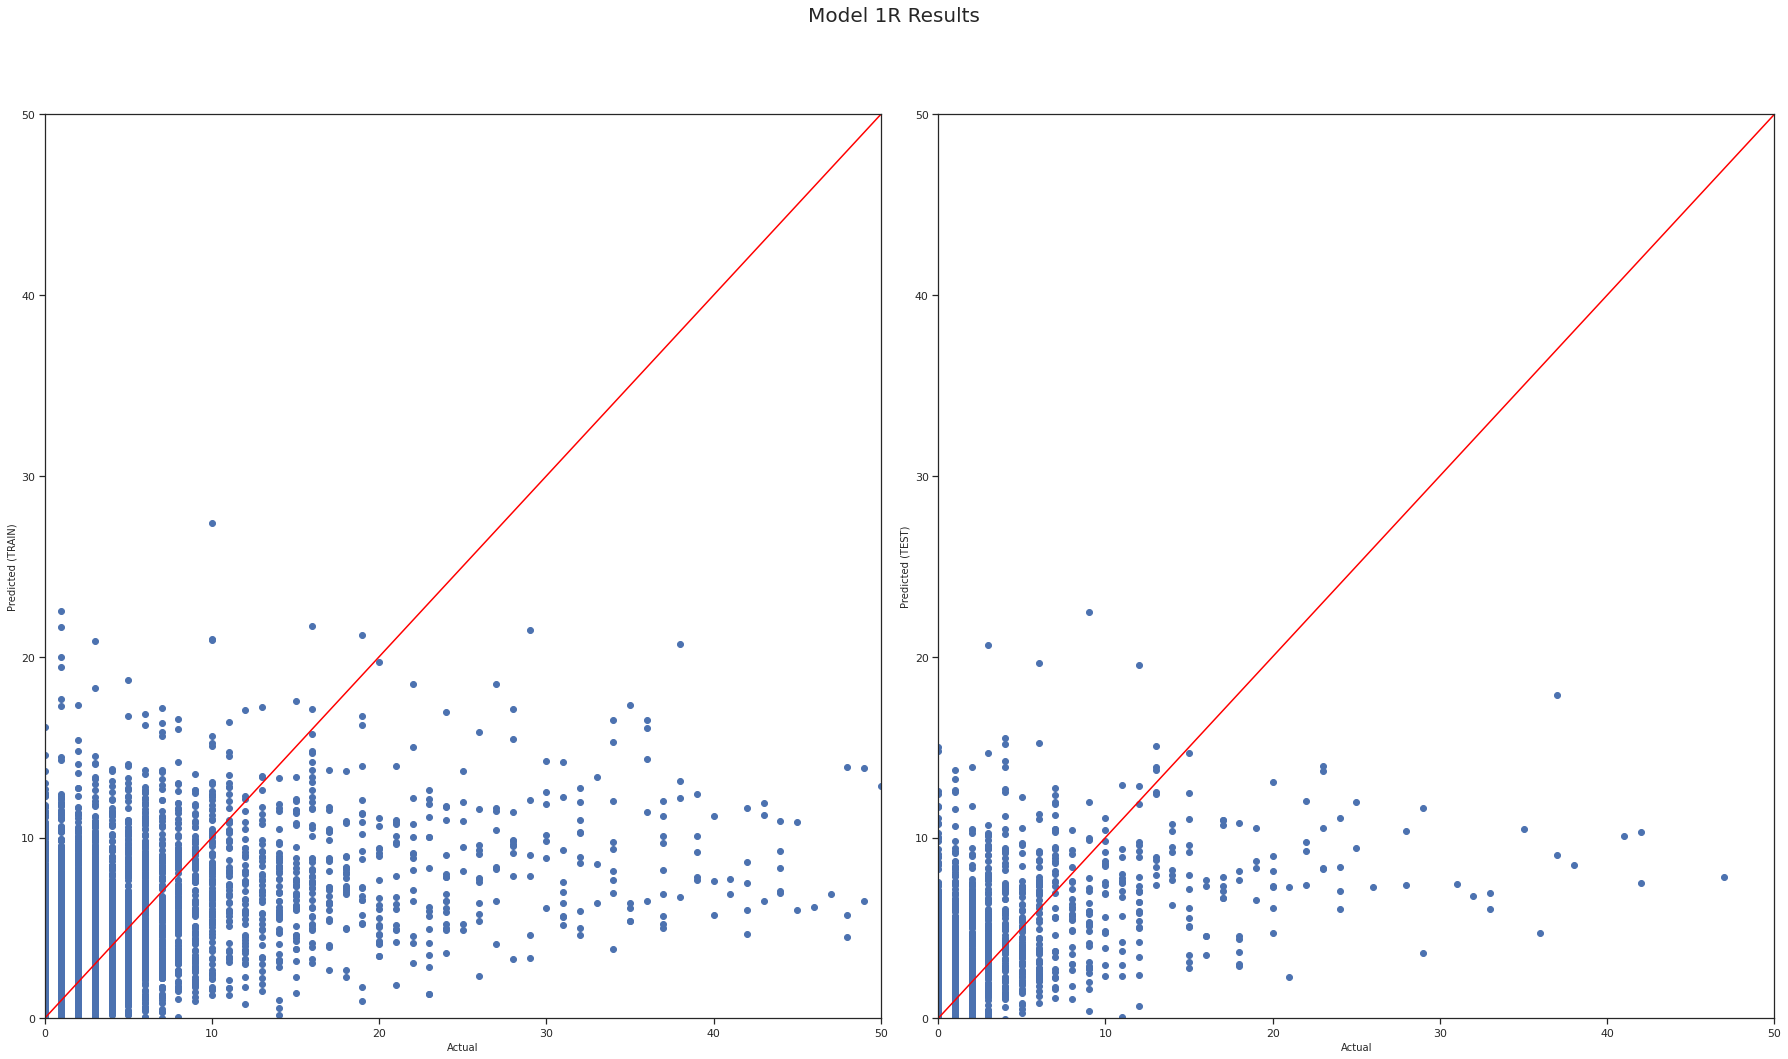

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits

# add a main title across top
fig.suptitle("Model 1R Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_1R) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=test_preds_1R) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## Model 2R

### Error Metrics on test data

In [ ]:
# Test
print('Mean Absolute Error: ', mean_absolute_error(y_test,test_preds_2R))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(y_test,test_preds_2R))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(y_test,test_preds_2R))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(y_test,test_preds_2R))  # Calculate MAPE
print('R2: ', r2_score(y_test,test_preds_2R))  # Calculate R2
print('Bias: ', np.mean(y_test - test_preds_2R))

Mean Absolute Error:  1.788552543806363
Median Absolute Error:  0.5918203652612275
MSE:  24.23086850815464
MAPE:  2110931517093115.5
R2:  0.3936380930075556
Bias:  -0.21414406186395904


### Error Metrics on train data

In [ ]:
# Train
print('Mean Absolute Error: ', mean_absolute_error(y_train,train_preds_2R))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(y_train,train_preds_2R))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(y_train,train_preds_2R))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(y_train,train_preds_2R))  # Calculate MAPE
print('R2: ', r2_score(y_train,train_preds_2R))  # Calculate R2
print('Bias: ', np.mean(y_train - train_preds_2R))

Mean Absolute Error:  1.5589832235202543
Median Absolute Error:  0.47299736823866906
MSE:  29.660170854164853
MAPE:  1623140742998772.5
R2:  0.5127309065627179
Bias:  -0.03740414400539152


### Scatter Plot

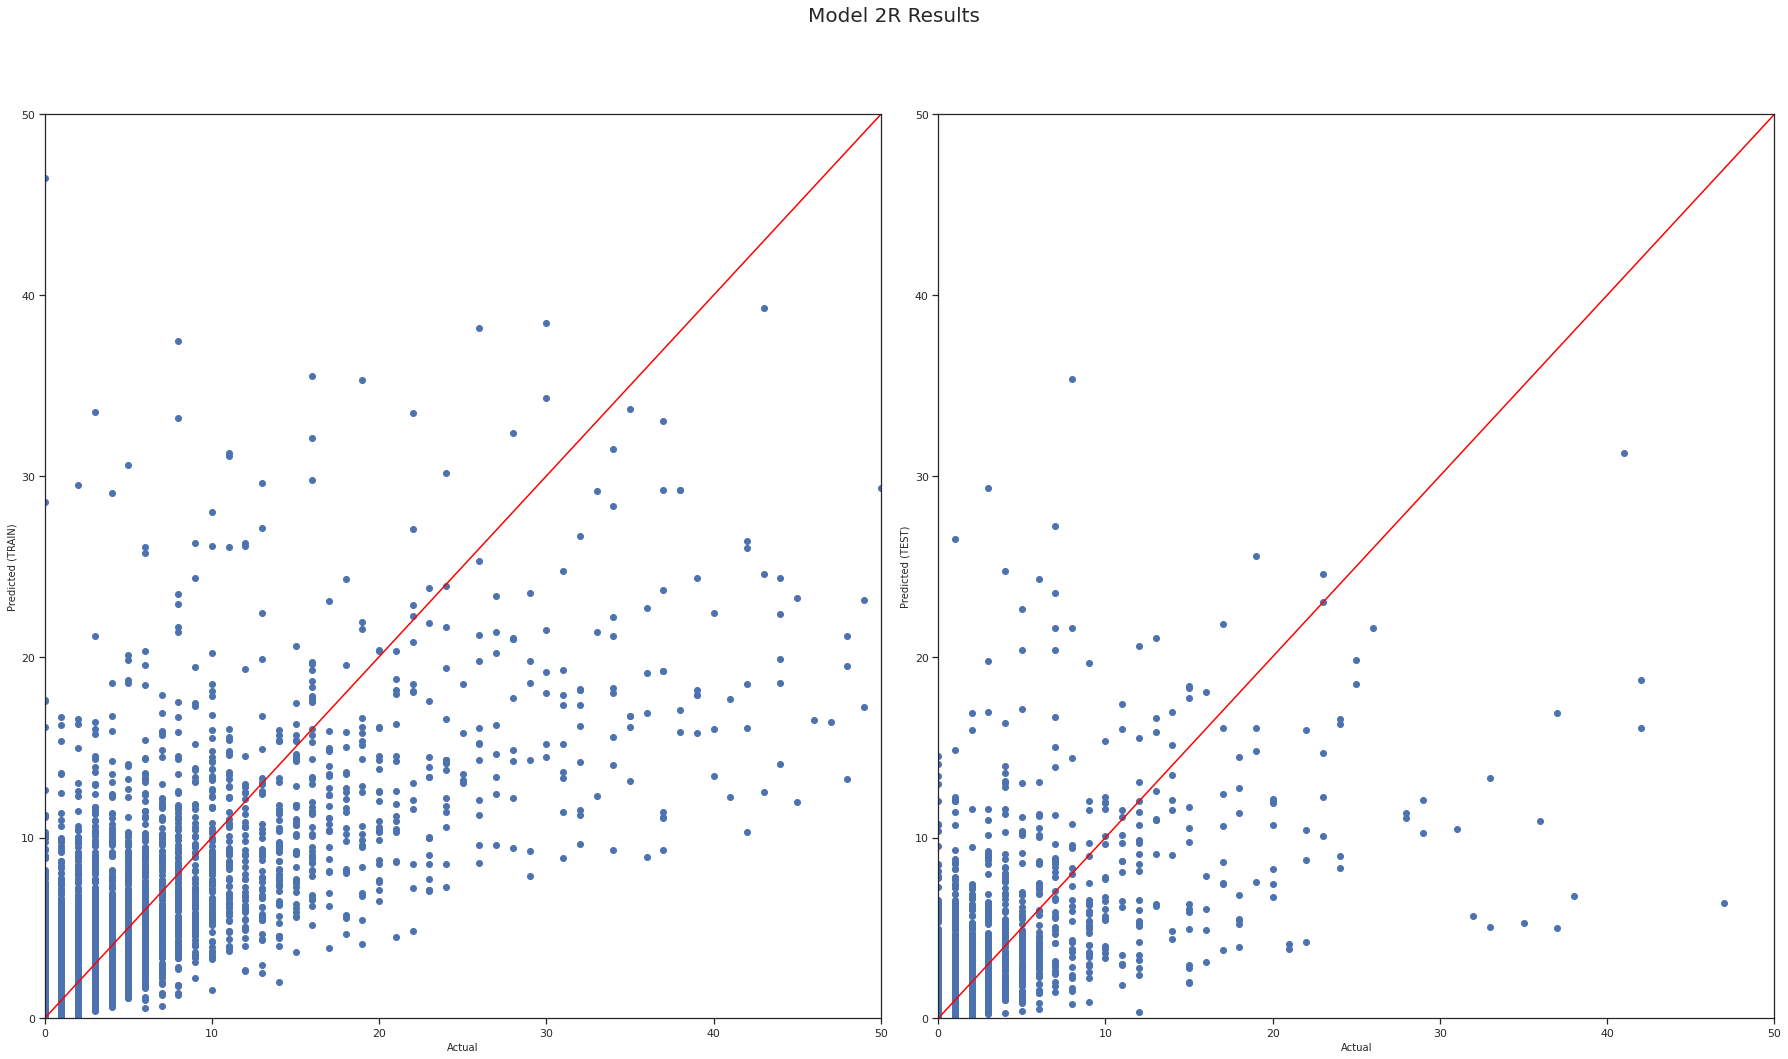

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits

# add a main title across top
fig.suptitle("Model 2R Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_2R) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=test_preds_2R) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## Model 3R

### Error Metrics on test data

In [ ]:
# Test
print('Mean Absolute Error: ', mean_absolute_error(testing_target, results))
print('Median Absolute Error: ', median_absolute_error(testing_target, results))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(testing_target, results))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(testing_target, results))  # Calculate MAPE
print('R2: ', r2_score(testing_target, results)) 
print('Bias: ', np.mean(testing_target - results))

Mean Absolute Error:  1.7887351534823983
Median Absolute Error:  0.5927829715770385
MSE:  23.439311140979285
MAPE:  2104960069180698.5
R2:  0.3865109073618692
Bias:  -0.17943383443011443


### Error Metrics on train data

In [ ]:
# Train
print('Mean Absolute Error: ', mean_absolute_error(training_target, results1))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(training_target, results1))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(training_target, results1))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(training_target, results1))  # Calculate MAPE
print('R2: ', r2_score(training_target, results1))  # Calculate R2
print('Bias: ', np.mean(results1 - training_target))

Mean Absolute Error:  1.6541847493510942
Median Absolute Error:  0.49378175952014947
MSE:  32.874404375048755
MAPE:  1750390072874987.8
R2:  0.47689532450560856
Bias:  9.570404724439434e-18


### Scatter Plot

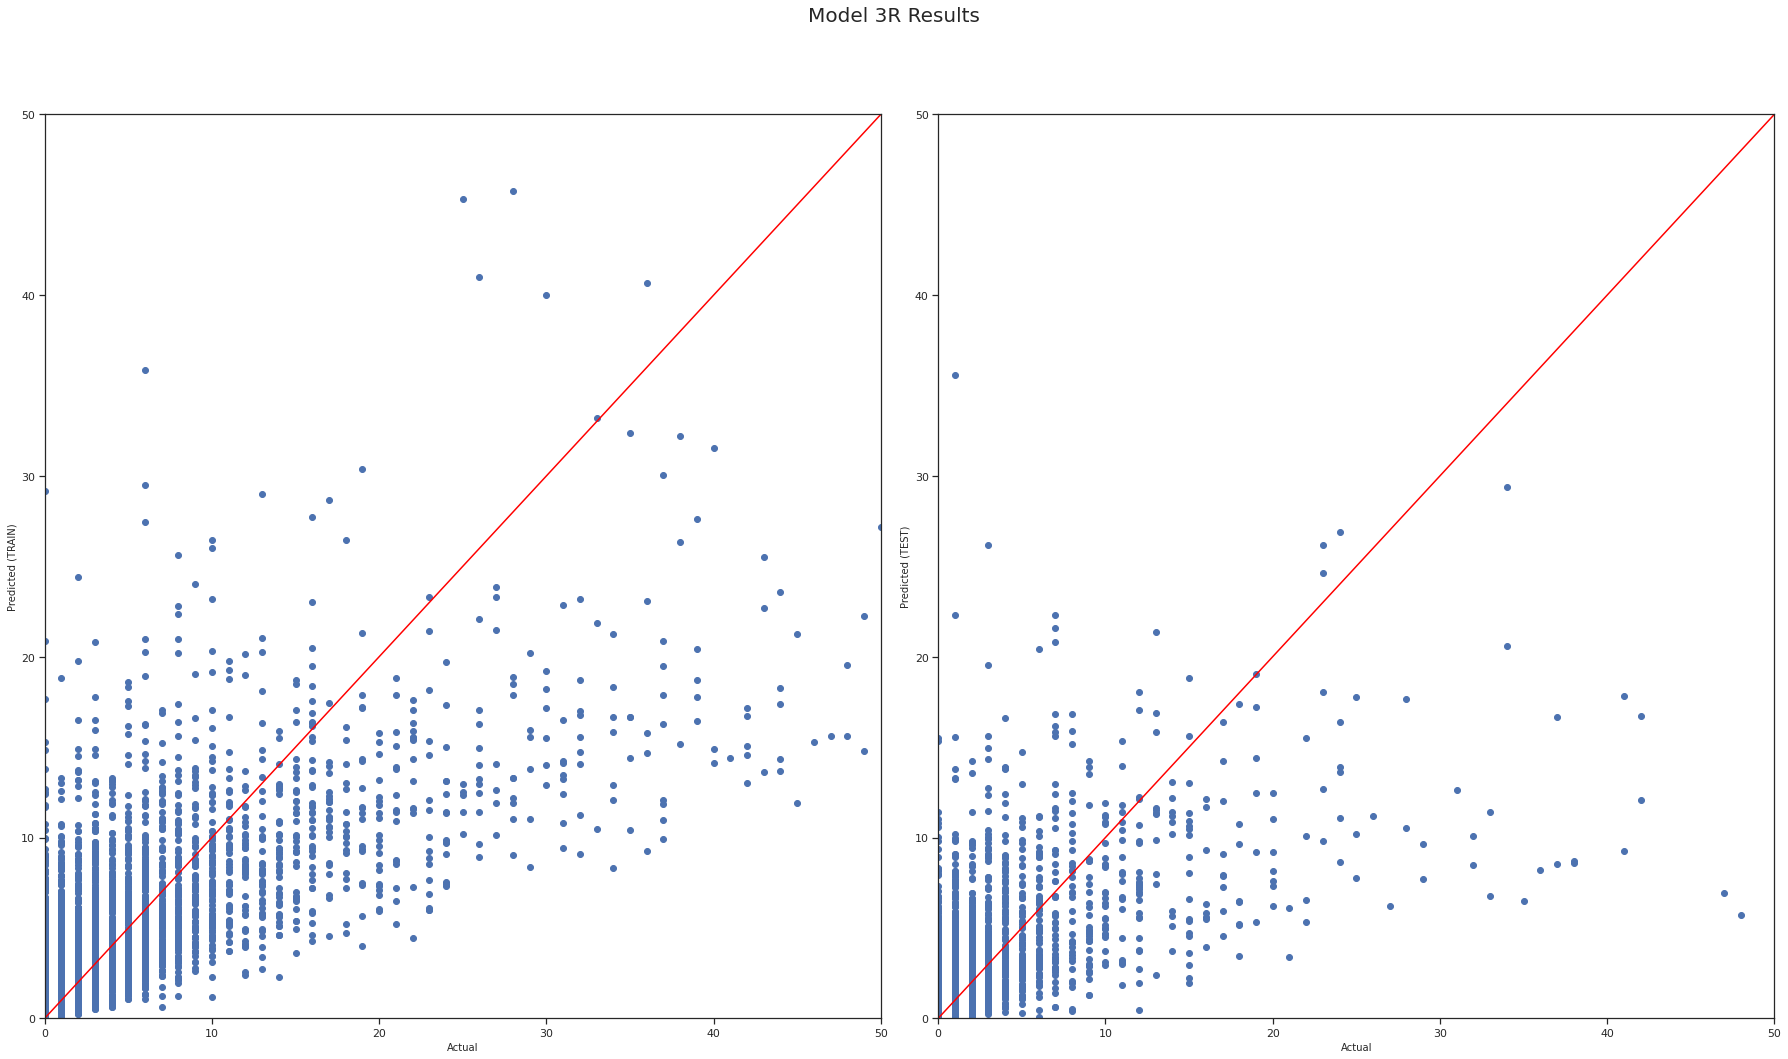

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits

# add a main title across top
fig.suptitle("Model 3R Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=training_target, y=results1) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=testing_target, y=results) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Permutation Feature Importance - Regression


Multiple Model Plots

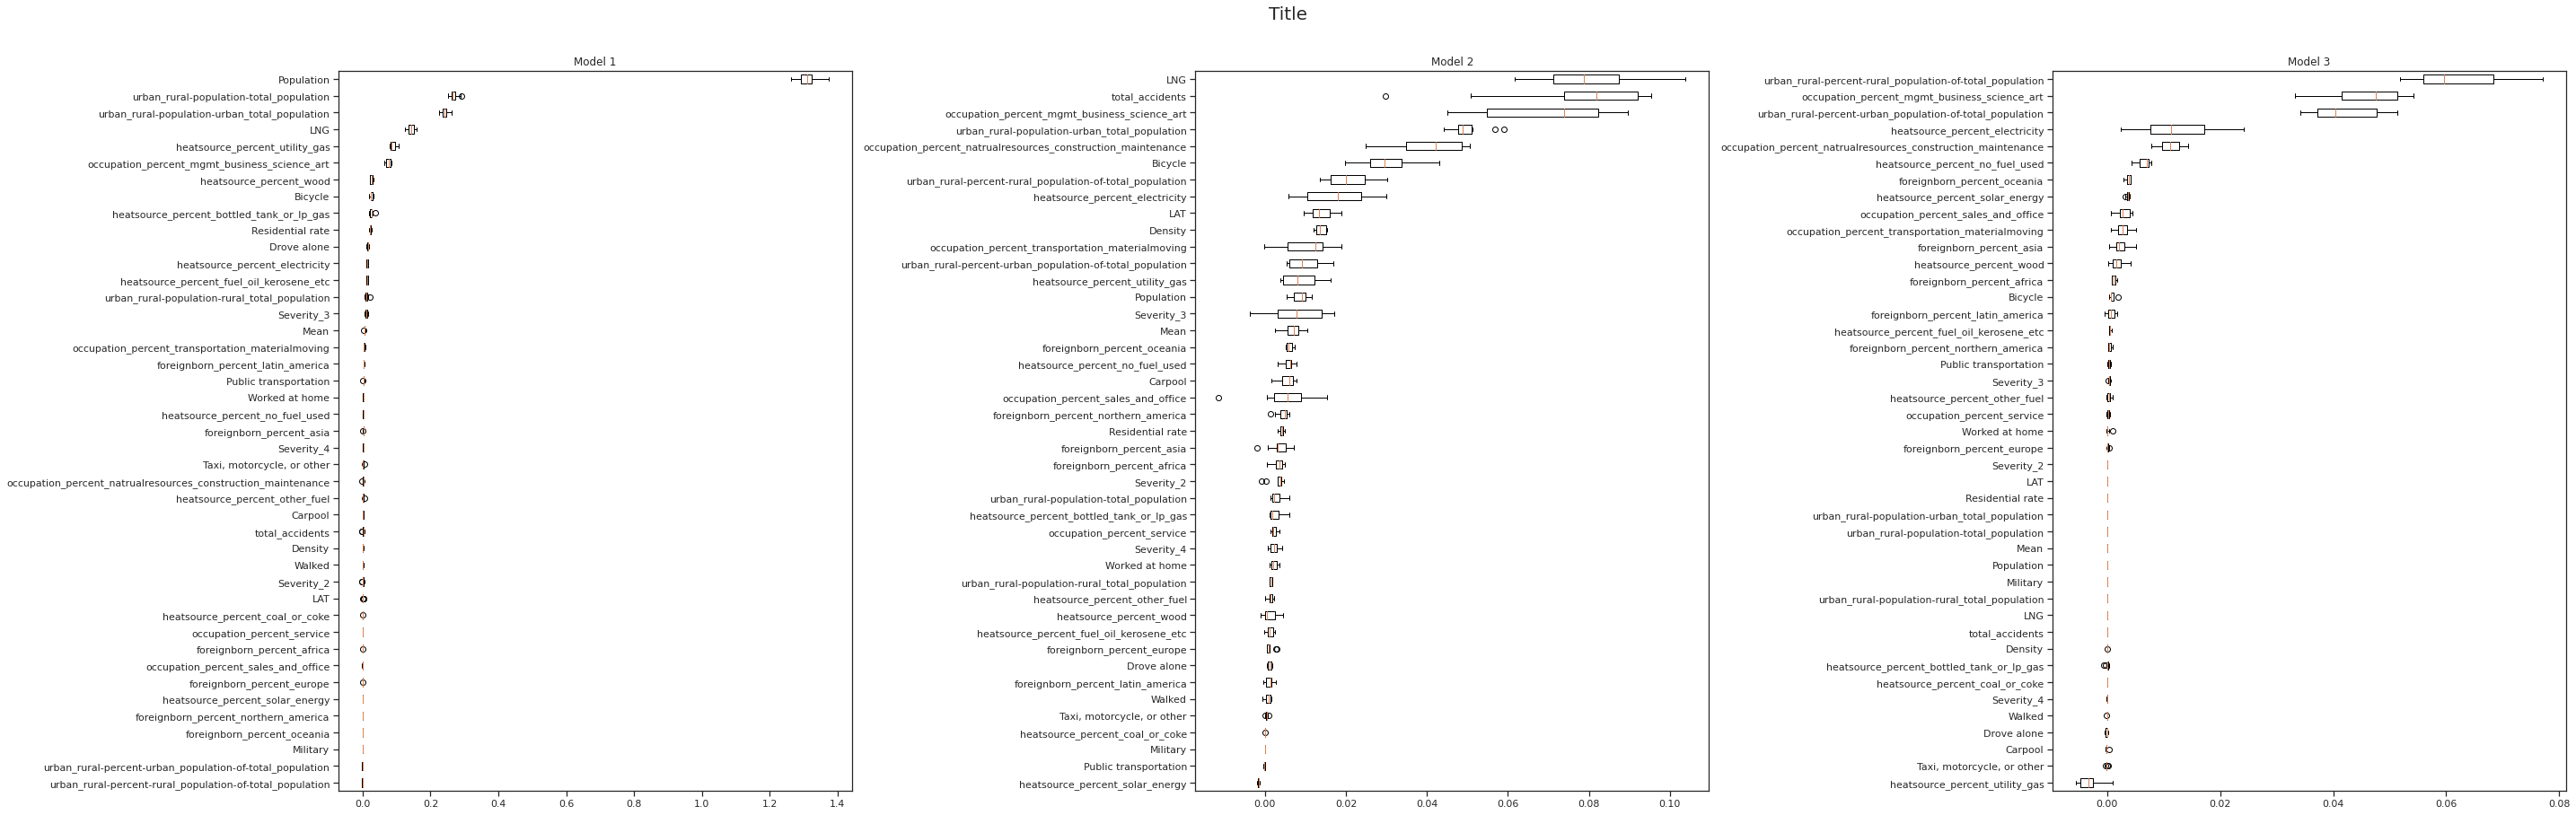

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 12)) 
plt.suptitle('Title', y= 1.05, size = 20)


# MODEL 1
clf = Model1R 
tmp = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=seed) # set the seed
perm_sorted_idx = tmp.importances_mean.argsort()
ax1.boxplot(tmp.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax1.set_title('Model 1')

# # MODEL 2
clf = Model2R 
tmp = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = tmp.importances_mean.argsort()

ax2.boxplot(tmp.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax2.set_title('Model 2')

# MODEL 3
clf = Model3R 
tmp = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = tmp.importances_mean.argsort()

ax3.boxplot(tmp.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax3.set_title('Model 3')

fig.tight_layout()
plt.show()

# Partial Dependence Plots - Regression Models

In [ ]:
# put data in DataFrame for pcyebox
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df = train_X_df.sample(n=1000, replace=False, random_state=seed)
print(train_X_df.shape)
train_X_df.head()

(1000, 43)


LAT       LNG  occupation_percent_mgmt_business_science_art  \
10270  0.551133  0.951438                                         0.287   
5282   0.776133  0.243749                                         0.303   
5048   0.760021  0.946993                                         0.301   
7091   0.504799  0.937953                                         0.255   
8840   0.711869  0.992430                                         0.347   

       occupation_percent_service  occupation_percent_sales_and_office  \
10270                       0.248                                0.142   
5282                        0.185                                0.247   
5048                        0.166                                0.252   
7091                        0.242                                0.245   
8840                        0.177                                0.245   

       occupation_percent_natrualresources_construction_maintenance  \
10270                                              0.116              
5282                                               0.120              
5048                                               0.133              
7091                                               0.084              
8840                                               0.133              

       occupation_percent_transportation_materialmoving  \
10270                                             0.206   
5282                                              0.146   
5048                                              0.147   
7091                                              0.173   
8840                                              0.098   

       heatsource_percent_utility_gas  \
10270                           0.030   
5282                            0.519   
5048                            0.685   
7091                            0.429   
8840                            0.040   

       heatsource_percent_bottled_tank_or_lp_gas  \
10270                                      0.187   
5282                                       0.037   
5048                                       0.038   
7091                                       0.013   
8840                                       0.127   

       heatsource_percent_electricity  ...  Severity_4  total_accidents  \
10270                           0.399  ...    0.016129         0.001731   
5282                            0.397  ...    0.064516         0.004154   
5048                            0.159  ...    0.032258         0.000346   
7091                            0.510  ...    0.467742         0.096227   
8840                            0.045  ...    0.016129         0.002077   

       Residential rate   Bicycle   Carpool  Drove alone  \
10270          0.543140  0.125828  0.743379     0.866780   
5282           0.382012  0.364531  0.790906     0.918796   
5048           0.464057  0.349272  0.522603     0.617226   
7091           0.429789  0.147671  0.770686     0.899177   
8840           0.685008  0.349272  0.522603     0.617226   

       Public transportation  Taxi, motorcycle, or other    Walked  \
10270               0.283365                    0.397291  0.297545   
5282                0.019051                    0.179554  0.382282   
5048                1.000000                    0.478909  1.000000   
7091                0.149478                    0.512063  0.316776   
8840                1.000000                    0.478909  1.000000   

       Worked at home  
10270        0.580377  
5282         0.797369  
5048         0.497089  
7091         0.608866  
8840         0.497089  

[5 rows x 43 columns]

In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=5, # adjust nrows and ncols to fit number of variables
                  ncols=2, figsize=(12, 12), sharex=False, sharey=True, 
                  num_grids_points=10,
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

## Model 1 Regression Partial Dependence Plots

In [ ]:
# columns to plot
features = ['Population', 'urban_rural-population-total_population','urban_rural-population-urban_total_population','LNG','heatsource_percent_utility_gas',
            'occupation_percent_mgmt_business_science_art','heatsource_percent_bottled_tank_or_lp_gas',
            'Bicycle','heatsource_percent_wood','Residential rate']

In [ ]:
# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=Model1R.predict) 
                 for feat in features}


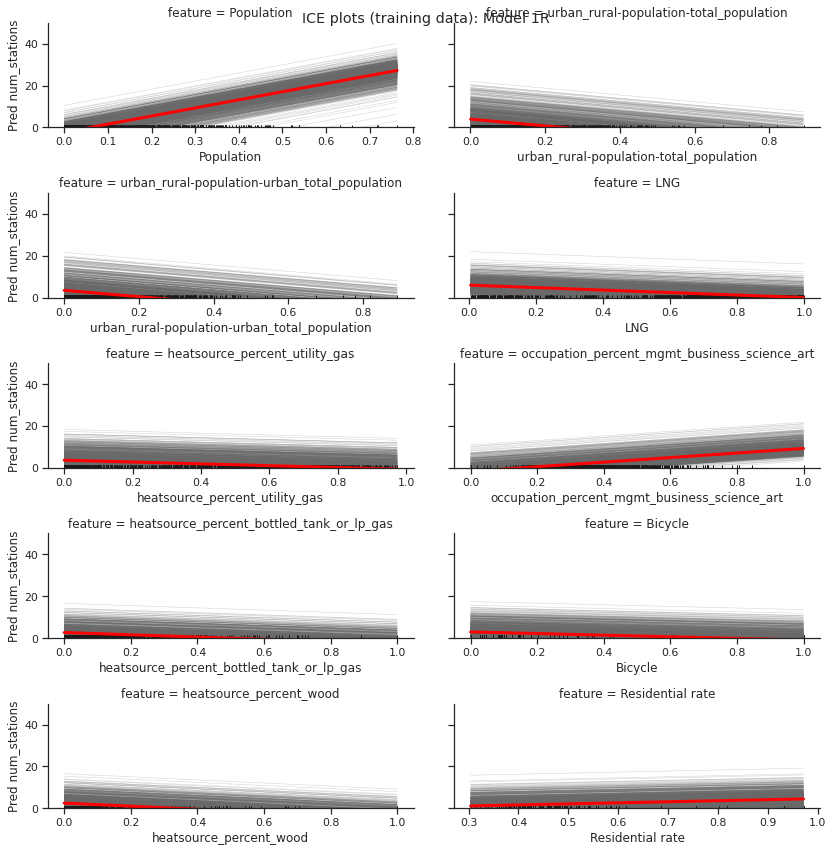

In [ ]:
plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred num_stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): Model 1R')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Model 2 Regression Partial Dependence Plots

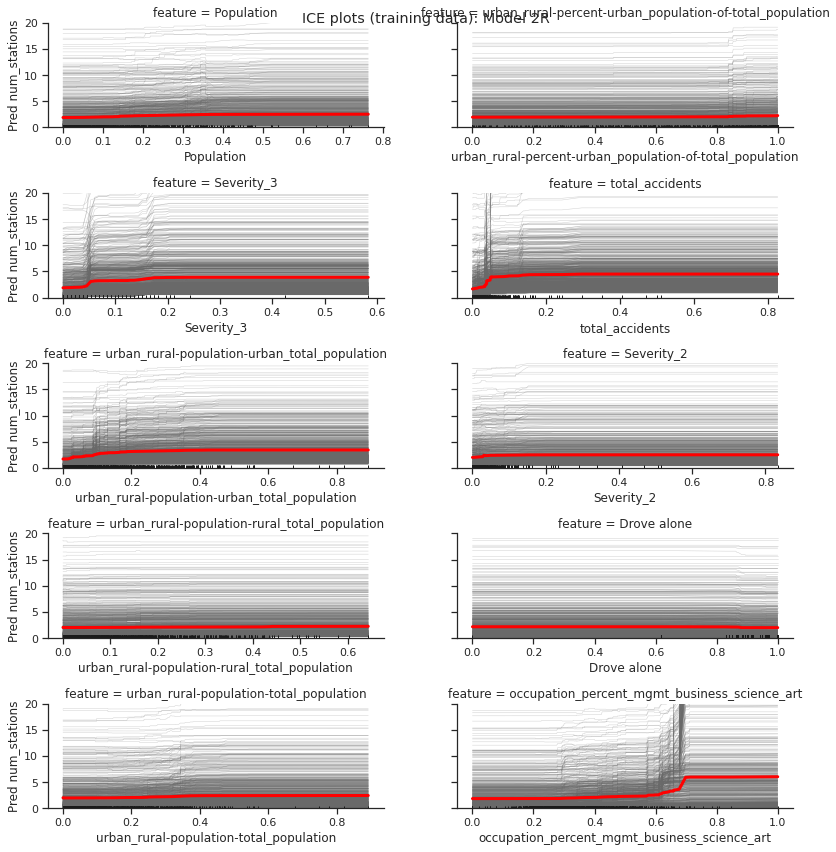

In [ ]:
# columns to plot
features = ['Population', 'urban_rural-percent-urban_population-of-total_population','Severity_3','total_accidents','urban_rural-population-urban_total_population','Severity_2',
            'urban_rural-population-rural_total_population', 'Drove alone', 'urban_rural-population-total_population',
            'occupation_percent_mgmt_business_science_art']

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=Model2R.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred num_stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,20])
plt.suptitle('ICE plots (training data): Model 2R')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Model 3 Regression Partial Dependence Plots

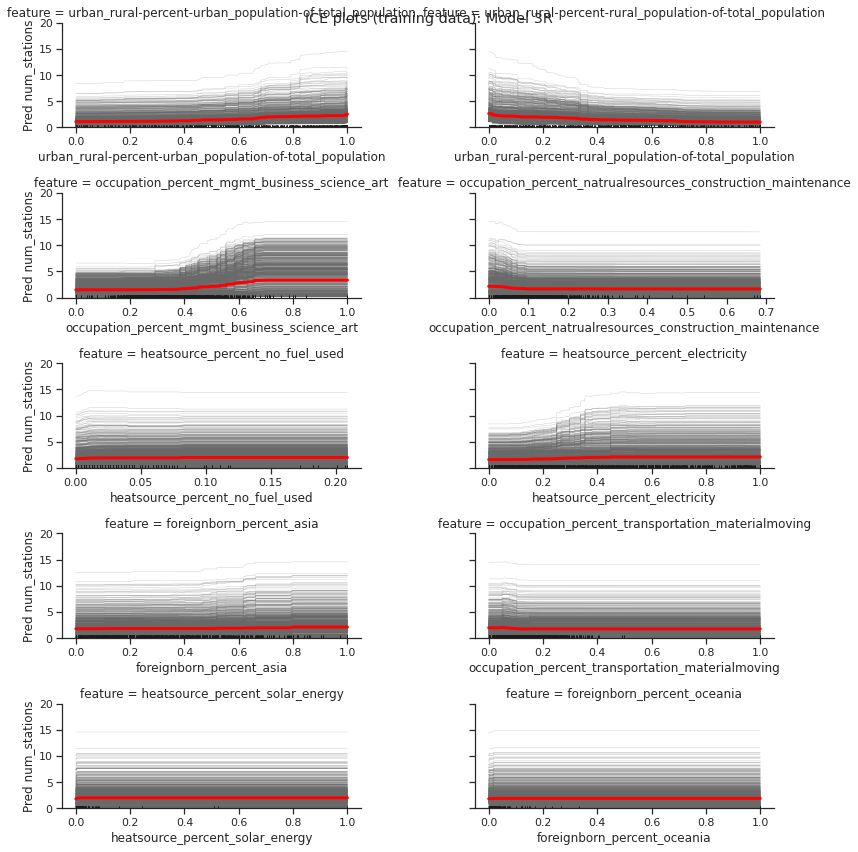

In [ ]:
# columns to plot
features = ['urban_rural-percent-urban_population-of-total_population','urban_rural-percent-rural_population-of-total_population','occupation_percent_mgmt_business_science_art',
            'occupation_percent_natrualresources_construction_maintenance', 'heatsource_percent_no_fuel_used',
            'heatsource_percent_electricity', 'foreignborn_percent_asia','occupation_percent_transportation_materialmoving','heatsource_percent_solar_energy','foreignborn_percent_oceania']

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=Model3R.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred num_stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,20])
plt.suptitle('ICE plots (training data): Model 3R')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

# Permutation Feature Importance - Classification






Multiple Model Plots

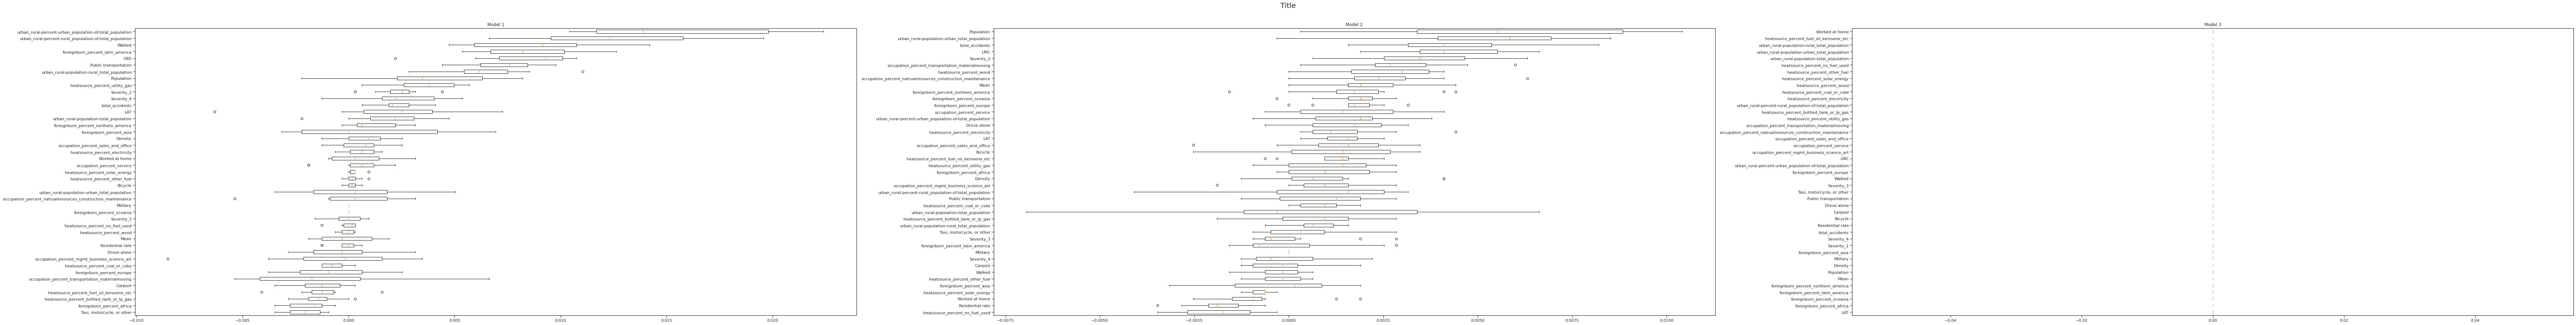

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 12)) 
plt.suptitle('Title', y= 1.05, size = 20)


# MODEL 1
clf = Model1C 
tmp1 = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
                                random_state=seed) # set the seed
perm_sorted_idx = tmp1.importances_mean.argsort()
ax1.boxplot(tmp1.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax1.set_title('Model 1')

# MODEL 2
clf = Model2C
tmp1 = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = tmp1.importances_mean.argsort()

ax2.boxplot(tmp1.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax2.set_title('Model 2')

# MODEL 3
clf = Model3C
tmp1 = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = tmp1.importances_mean.argsort()

ax3.boxplot(tmp1.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax3.set_title('Model 3')

fig.tight_layout()
plt.show()

# Partial Dependence Plots - Classification Models

In [ ]:
# put data in DataFrame for pcyebox
train_X_df_C = pd.DataFrame(X_train_C, columns=X.columns)
train_X_df_C = train_X_df_C.sample(n=1000, replace=False, random_state=seed)
print(train_X_df_C.shape)
train_X_df_C.head()

(1000, 43)


LAT       LNG  occupation_percent_mgmt_business_science_art  \
10270  0.551133  0.951438                                         0.287   
5282   0.776133  0.243749                                         0.303   
5048   0.760021  0.946993                                         0.301   
7091   0.504799  0.937953                                         0.255   
8840   0.711869  0.992430                                         0.347   

       occupation_percent_service  occupation_percent_sales_and_office  \
10270                       0.248                                0.142   
5282                        0.185                                0.247   
5048                        0.166                                0.252   
7091                        0.242                                0.245   
8840                        0.177                                0.245   

       occupation_percent_natrualresources_construction_maintenance  \
10270                                              0.116              
5282                                               0.120              
5048                                               0.133              
7091                                               0.084              
8840                                               0.133              

       occupation_percent_transportation_materialmoving  \
10270                                             0.206   
5282                                              0.146   
5048                                              0.147   
7091                                              0.173   
8840                                              0.098   

       heatsource_percent_utility_gas  \
10270                           0.030   
5282                            0.519   
5048                            0.685   
7091                            0.429   
8840                            0.040   

       heatsource_percent_bottled_tank_or_lp_gas  \
10270                                      0.187   
5282                                       0.037   
5048                                       0.038   
7091                                       0.013   
8840                                       0.127   

       heatsource_percent_electricity  ...  Severity_4  total_accidents  \
10270                           0.399  ...    0.016129         0.001731   
5282                            0.397  ...    0.064516         0.004154   
5048                            0.159  ...    0.032258         0.000346   
7091                            0.510  ...    0.467742         0.096227   
8840                            0.045  ...    0.016129         0.002077   

       Residential rate   Bicycle   Carpool  Drove alone  \
10270          0.543140  0.125828  0.743379     0.866780   
5282           0.382012  0.364531  0.790906     0.918796   
5048           0.464057  0.349272  0.522603     0.617226   
7091           0.429789  0.147671  0.770686     0.899177   
8840           0.685008  0.349272  0.522603     0.617226   

       Public transportation  Taxi, motorcycle, or other    Walked  \
10270               0.283365                    0.397291  0.297545   
5282                0.019051                    0.179554  0.382282   
5048                1.000000                    0.478909  1.000000   
7091                0.149478                    0.512063  0.316776   
8840                1.000000                    0.478909  1.000000   

       Worked at home  
10270        0.580377  
5282         0.797369  
5048         0.497089  
7091         0.608866  
8840         0.497089  

[5 rows x 43 columns]

## Model 1 Classification Partial Dependence Plots

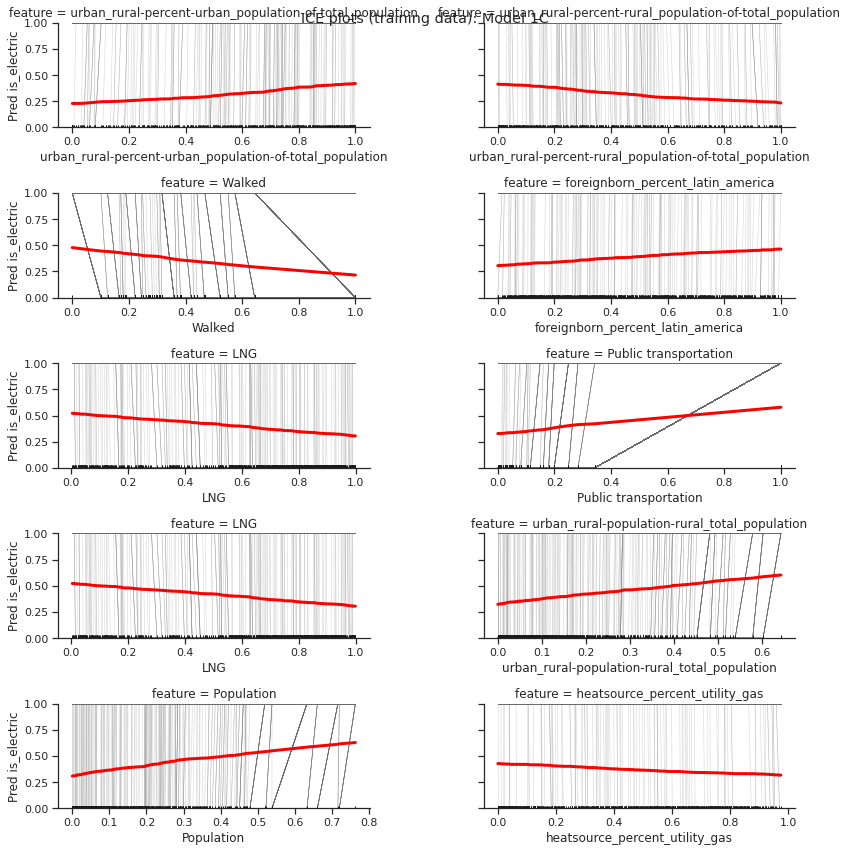

In [ ]:
# columns to plot
features = ['urban_rural-percent-urban_population-of-total_population','urban_rural-percent-rural_population-of-total_population','Walked','foreignborn_percent_latin_america',
            'LNG','Public transportation','LNG','urban_rural-population-rural_total_population','Population',
           'heatsource_percent_utility_gas']

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df_C, column=feat, predict=Model1C.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df_C, features,
                    ax_ylabel='Pred is_electric', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): Model 1C')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Model 2 Classification Partial Dependence Plots

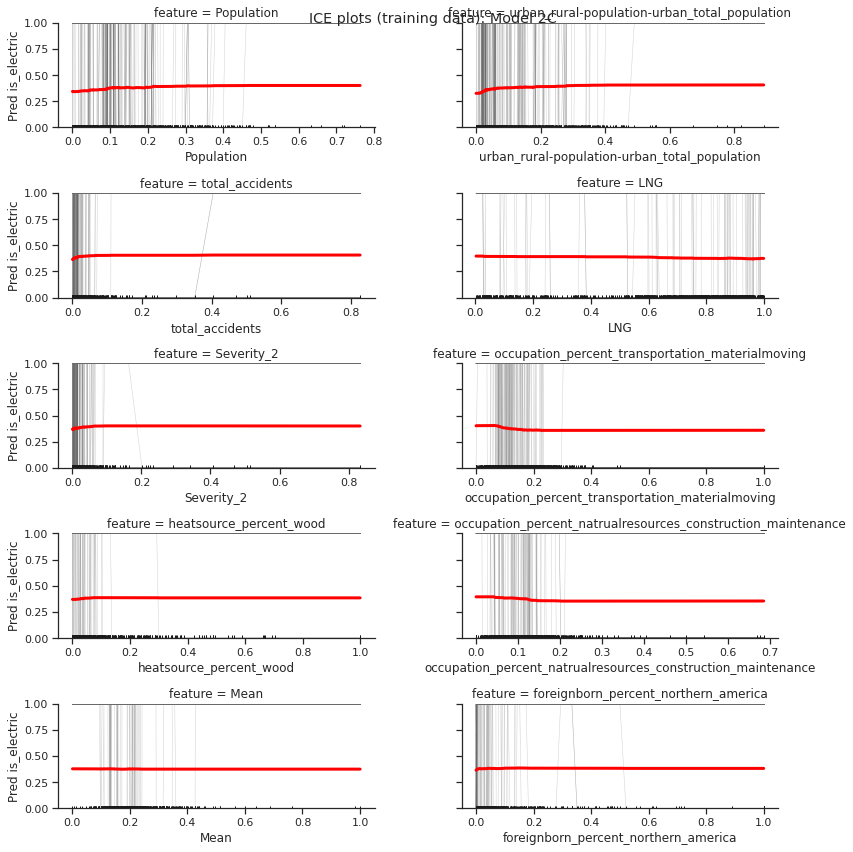

In [ ]:
# columns to plot
features = ['Population','urban_rural-population-urban_total_population','total_accidents','LNG', 'Severity_2',
            'occupation_percent_transportation_materialmoving',
            'heatsource_percent_wood','occupation_percent_natrualresources_construction_maintenance',
            'Mean', 'foreignborn_percent_northern_america']

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df_C, column=feat, predict=Model2C.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df_C, features,
                    ax_ylabel='Pred is_electric', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): Model 2C')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Model 3 Classification Partial Dependence Plots

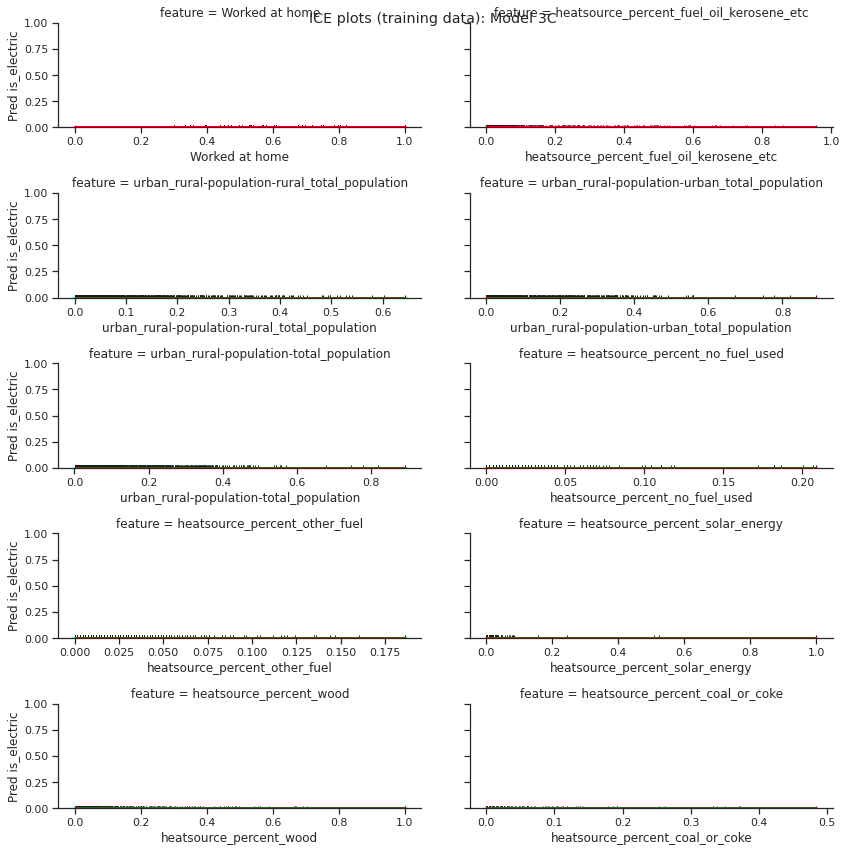

In [ ]:
# columns to plot
features = ['Worked at home','heatsource_percent_fuel_oil_kerosene_etc','urban_rural-population-rural_total_population',
            'urban_rural-population-urban_total_population', 'urban_rural-population-total_population',
            'heatsource_percent_no_fuel_used','heatsource_percent_other_fuel','heatsource_percent_solar_energy',
            'heatsource_percent_wood','heatsource_percent_coal_or_coke']
# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df_C, column=feat, predict=Model3C.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df_C, features,
                    ax_ylabel='Pred is_electric', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): Model 3C')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

# Modeling Suggestions

## Regression

### Splitting

In [ ]:
result

{'importances': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.

In [ ]:
X1 = result.loc[:,['Population', 'urban_rural-percent-urban_population-of-total_population','Severity_3','total_accidents','urban_rural-population-urban_total_population','Severity_2',
            'urban_rural-population-rural_total_population', 'Drove alone', 'urban_rural-population-total_population','occupation_percent_mgmt_business_science_art']] #top 10 variables
            
y1 = result['num_stations'] #target variable
seed = 21 # Group ID

# split!
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = seed)

AttributeError: ignored

###Scaling

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

###Run Model

In [ ]:
Model3R = ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=10, min_samples_split=20, n_estimators=100)
Model3R.fit(X_train, y_train)
test_preds_3R = Model3R.predict(X_test)
train_preds_3R = Model3R.predict(X_train)

###Error Metrics

In [ ]:
# (y_pred from the best model)
print('Mean Absolute Error: ', mean_absolute_error(y_test,test_preds_3R))  # Calculate the mean absolute error
print('Median Absolute Error: ', median_absolute_error(y_test,test_preds_3R))  # Calculate the median absolute error
print('MSE: ', mean_squared_error(y_test,test_preds_3R))  # Calculate MSE
print('MAPE: ', mean_absolute_percentage_error(y_test,test_preds_3R))  # Calculate MAPE
print('R2: ', r2_score(y_test,test_preds_3R))  # Calculate R2
print('Bias: ', np.mean(test_preds_3R - y_test))

## Classification

### Splitting

In [ ]:
X = result.loc[:,['total_accidents','LNG', 'heatsource_percent_utility_gas','Severity_2',  'heatsource_percent_wood',
                  'Bicycle','Density','Population', 'Drove alone', 'urban_rural-population-total_population']] # top 10 important variables
y = result['is_electric'] #target variable
seed = 21 

# split!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = seed)

AttributeError: ignored

###Scaling

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

### Run Model

In [ ]:
# Best classification model with selected parameters
Model2C = RandomForestClassifier(random_state=seed, criterion='entropy', min_samples_leaf=5)
Model2C.fit(X_train, y_train)

In [ ]:
test_preds_2C = Model2C.predict(X_test)
train_preds_2C = Model2C.predict(X_train)

###Error Metrics

In [ ]:
# Train
print('Classification report: ', classification_report(y_train, train_preds_2C))

print('Confusion matrix: ', confusion_matrix(y_train, train_preds_2C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_2C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

In [ ]:
# Test
print('Classification report: ', classification_report(y_test, test_preds_2C))

print('Confusion matrix: ', confusion_matrix(y_test, test_preds_2C))

# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_2C).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

# Conclusion

* Starting with the original dataset, we admittedly wasted a lot of time trying to transform that data to be used in the modeling. Alas, we realized that we really just needed to extract our target variables and utilize the additional sources to build our data for modeling. With that said, we incorporated the provided additional sources (at least what we thought were the most applicable variables) and others that we considered relevant to electric charging stations. We wanted to make sure that the date we fed to the models was interpretable and useful for decision making for various stakeholders (consumers, manufacturers, politicians, investors etc).
* Next time, we would like to find even more supplementary data for the models to work with. Given the runtimes and Colab logistics, it was difficult to incorporate a plethora of variables that could have improved model performance. In the future, working with enhanced compute capacity allowing for much more data to be incorporated will provide much better models (we think). Then, at least we could have a larger selection to put through permutation testing and determine the most critical variables.
* The classification models that we developed illuminate important characteristics of areas that determine whether or not there is a charging station. We not only see the value in accuracy, but from false positives we believe that charging companies can identify areas that a station would flourish.
* Knowing the features of locations that currently have charging stations, and the relative importance of those features, is useful to consumers and manufacturers alike. Consumers interested in electric vehicles, but live in an area with no stations, can infer the likelihood of charging stations coming to their area. Likewise, manufacturers can spot potential untapped markets and enhance lobbying efforts, advertising and investment to expand their customer base.
* We can see that the way toward reducing the global carbon footprint is through electric vehicles. As the popularity of EVs rises and more legacy manufacturers expand their development thereby increasing their supply of EVs to the market, there is going to be an unquestionable rise in demand for charging. Identifying existing coverage gaps will be critical to implement and maintain the electric grid that supports humanity's efforts to combat climate change.